# Car Price Prediction

## About Dataset
### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

### Business Goal
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## Data Set Information:

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.

### Attribute Information:

Attribute: Attribute Range

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:alfa-romero, audi, bmw, chevrolet, dodge, honda,isuzu,jaguar, mazda, mercedes-benz, mercury,mitsubishi, nissan, peugot, plymouth, porsche,renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.



In [404]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pylab
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## Loading of Dataset

In [450]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [451]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [408]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


## Understanding of the Data

In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

 There are 10 categorical data and 16 numerical attributes
 

In [410]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

No null values present

In [411]:
df.duplicated().sum()

0

No duplicate values ,the data looks clean.

### Separating the categorical and numerical data

In [412]:
dfc=df.select_dtypes(include='object')

In [452]:
# Categorical Data
dfc.head()

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


In [453]:
# Numerical Data
dfn=df.select_dtypes(include=['float64','int64'])

In [454]:
dfn.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data Cleaning

In [416]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

#### Observation:-
We see the car name is followed by the company name . Lets separate that in different columns

In [417]:
Companyname=df['CarName'].apply(lambda x: x.split(' ')[0])
df.insert(2,'CompanyName',Companyname)

In [418]:
df.drop(columns='CarName',inplace=True)

In [419]:
#Dataset with only the company name
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [420]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### Observation

There seems to be some spelling error in the CompanyName column.

maxda = mazda

Nissan = nissan

porsche = porcshce

toyota = toyouta

vokswagen = volkswagen = vw

So we have to replace those incorrect car company names wit correct company's name.

#### Creating a Function to Replace the Values

In [421]:
def replace(a,b):
    df["CompanyName"].replace(a,b,inplace=True)

replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')
replace('Nissan','nissan')

### Statistical data

In [422]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


#### Observation:-
1. Car prices range between 5118~45400
2. Average price is 13276.710571

## EDA

In [423]:
dfc=df.select_dtypes(include='object')
dfc.columns

Index(['CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [377]:
dfn=df.select_dtypes(include=['float64','int64'])
dfn.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Lets Visualize each of these columns with the target variable

#### But first lets check the distribution of the target variable which is the Price.

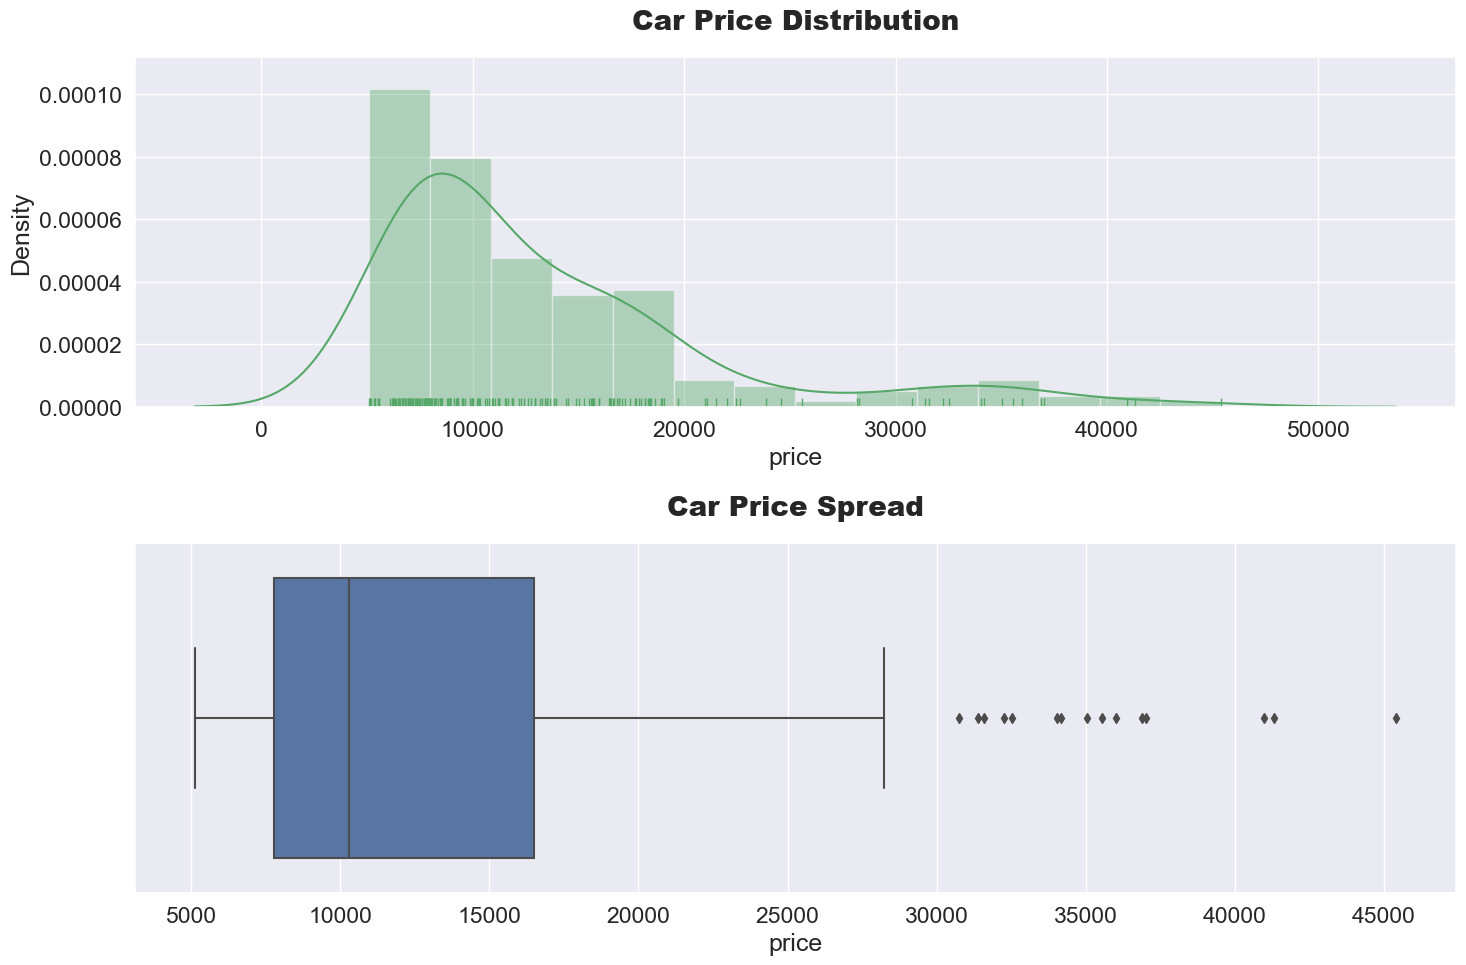

In [378]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.distplot(df['price'],kde=True,color='g',rug=True,label= 'Price')
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(2,1,2)
sns.boxplot(df['price'])
plt.title("Car Price Spread",fontweight="black",pad=20,fontsize=20)

plt.tight_layout()
plt.show()

In [24]:
df["price"].agg(["min","mean","median","max","std","skew"]).to_frame().T

,min,mean,median,max,std,skew
price,5118.0,13276.710571,10295.0,45400.0,7988.852332,1.777678


### Observation
1. The distribution Curve of the price column is right skewed.
2. There is good difference between the mean and median.
3. We can also see alot of outliers .
4. The datapoints are highly spread

# Visualization of Categorical Data

## 1.Visualizing the total number of car sold

Text(0.5, 1.0, 'Total Cars produced by Companies')

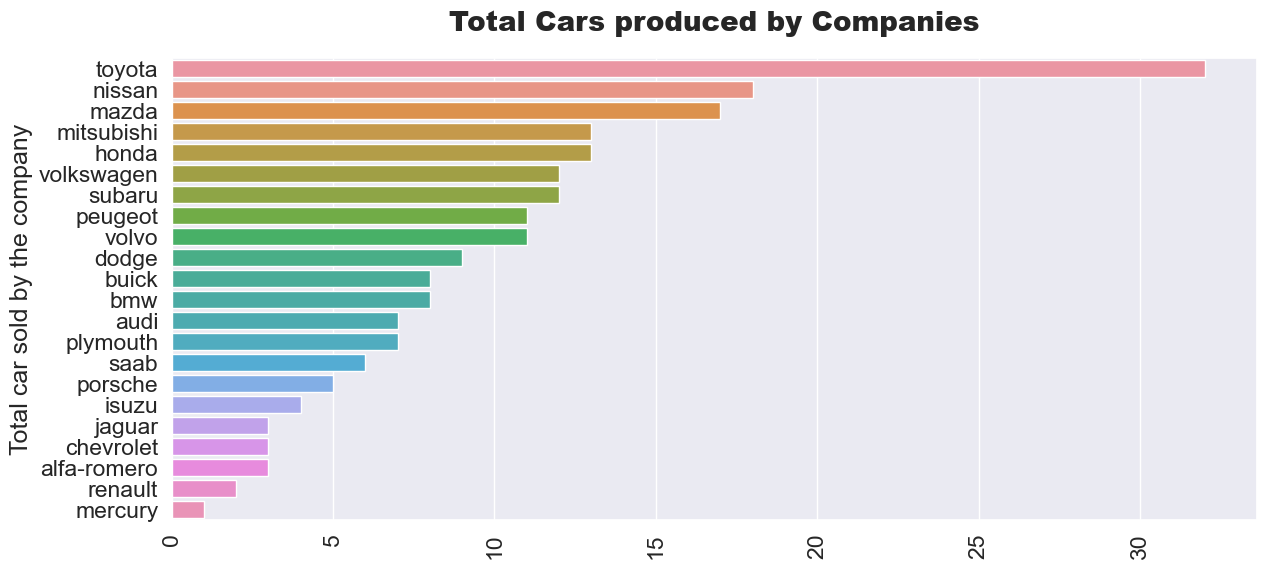

In [25]:
plt.figure(figsize=(14,6))
sns.barplot(y=df["CompanyName"].value_counts().index, x=df["CompanyName"].value_counts().values)
plt.xticks(rotation=90)
plt.ylabel('Total car sold by the company')
plt.title("Total Cars produced by Companies", pad=20, fontweight="black", fontsize=20)

#### Insights

1. Toyota company has sold the highest number of cars.
2. So we can say that Toyota is kind of customers most favoured company.
3. Nisaan ,Mercury or renault are having very low data-points. So we can't make any inference of least sold car companies.

### 2.Visualizing the car company w.r.t Price and average price

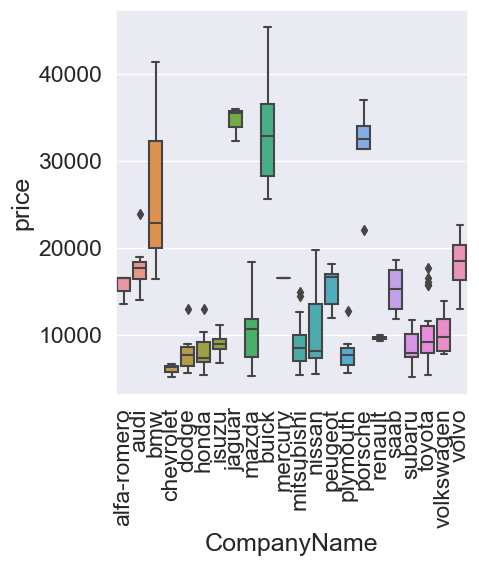

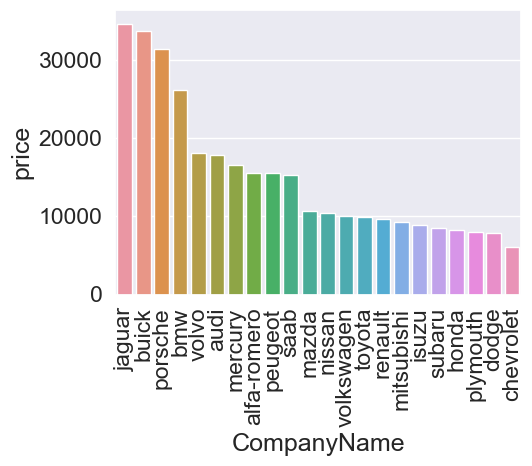

In [30]:
#Which has company the max price range
mean_price= pd.DataFrame(df.groupby("CompanyName")["price"].mean().sort_values(ascending=False))
max_price=pd.DataFrame(df.groupby("CompanyName")["price"].max().sort_values(ascending=False))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x='CompanyName',y='price',data=df)
plt.xticks(rotation=90)


plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
sns.barplot(x=mean_price.index,y='price',data=mean_price)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### Observation:-
1. Jaguar, Buick,porsche ,bmw has the highest range of cars.
2. Chevrolet, dodge,plymouth have very low pricing and also the datapoints r very less to make and interferance

#### Note

Since there are too many categories in car compnay feature. So we can derive a new feature Company Price Range which will show the price range as Low Range, Medium Range, High Range.

### 3. Visualization of car fuel type

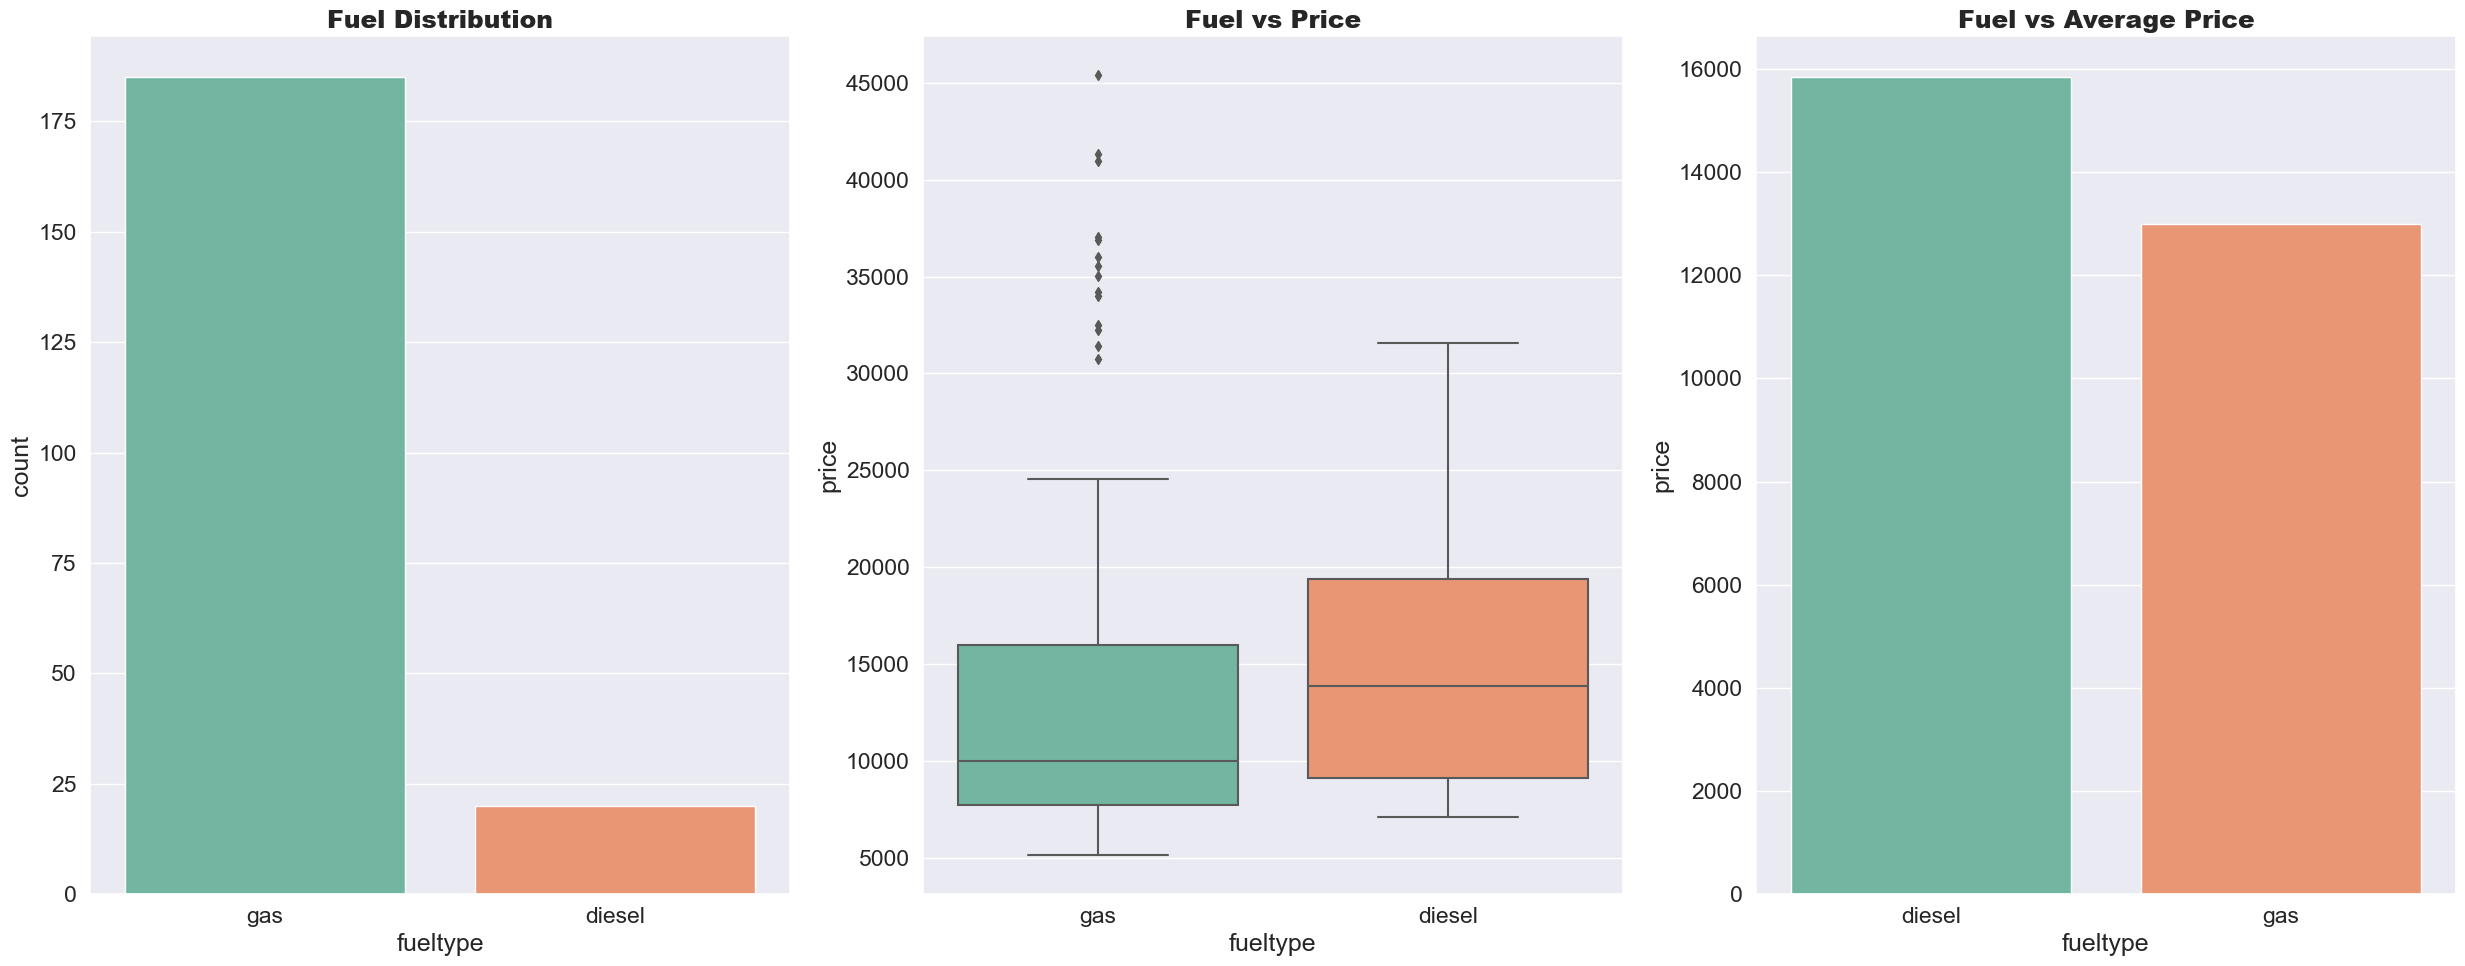

In [80]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
sns.countplot(x='fueltype',data=df,palette="Set2")
plt.title('Fuel Distribution',fontweight="black",fontsize=18)

plt.subplot(1,3,2)
sns.boxplot(x='fueltype',y='price',data=df,palette="Set2")
plt.title('Fuel vs Price',fontweight="black",fontsize=18)

plt.subplot(1,3,3)
x=pd.DataFrame(df.groupby('fueltype')['price'].mean())
sns.barplot(x=x.index,y='price',data=x,palette="Set2")
plt.title('Fuel vs Average Price',fontweight="black",fontsize=18)
plt.tight_layout()

#### Observation:-
1. Gas is used more than diesel.
2. Diesel pricing is more than gas,the gas pricinghas a outliers .
3. The average price if fuel is more than gas thats why people prefer using gas rather than diesel.

### 4.Visualization of Aspiration

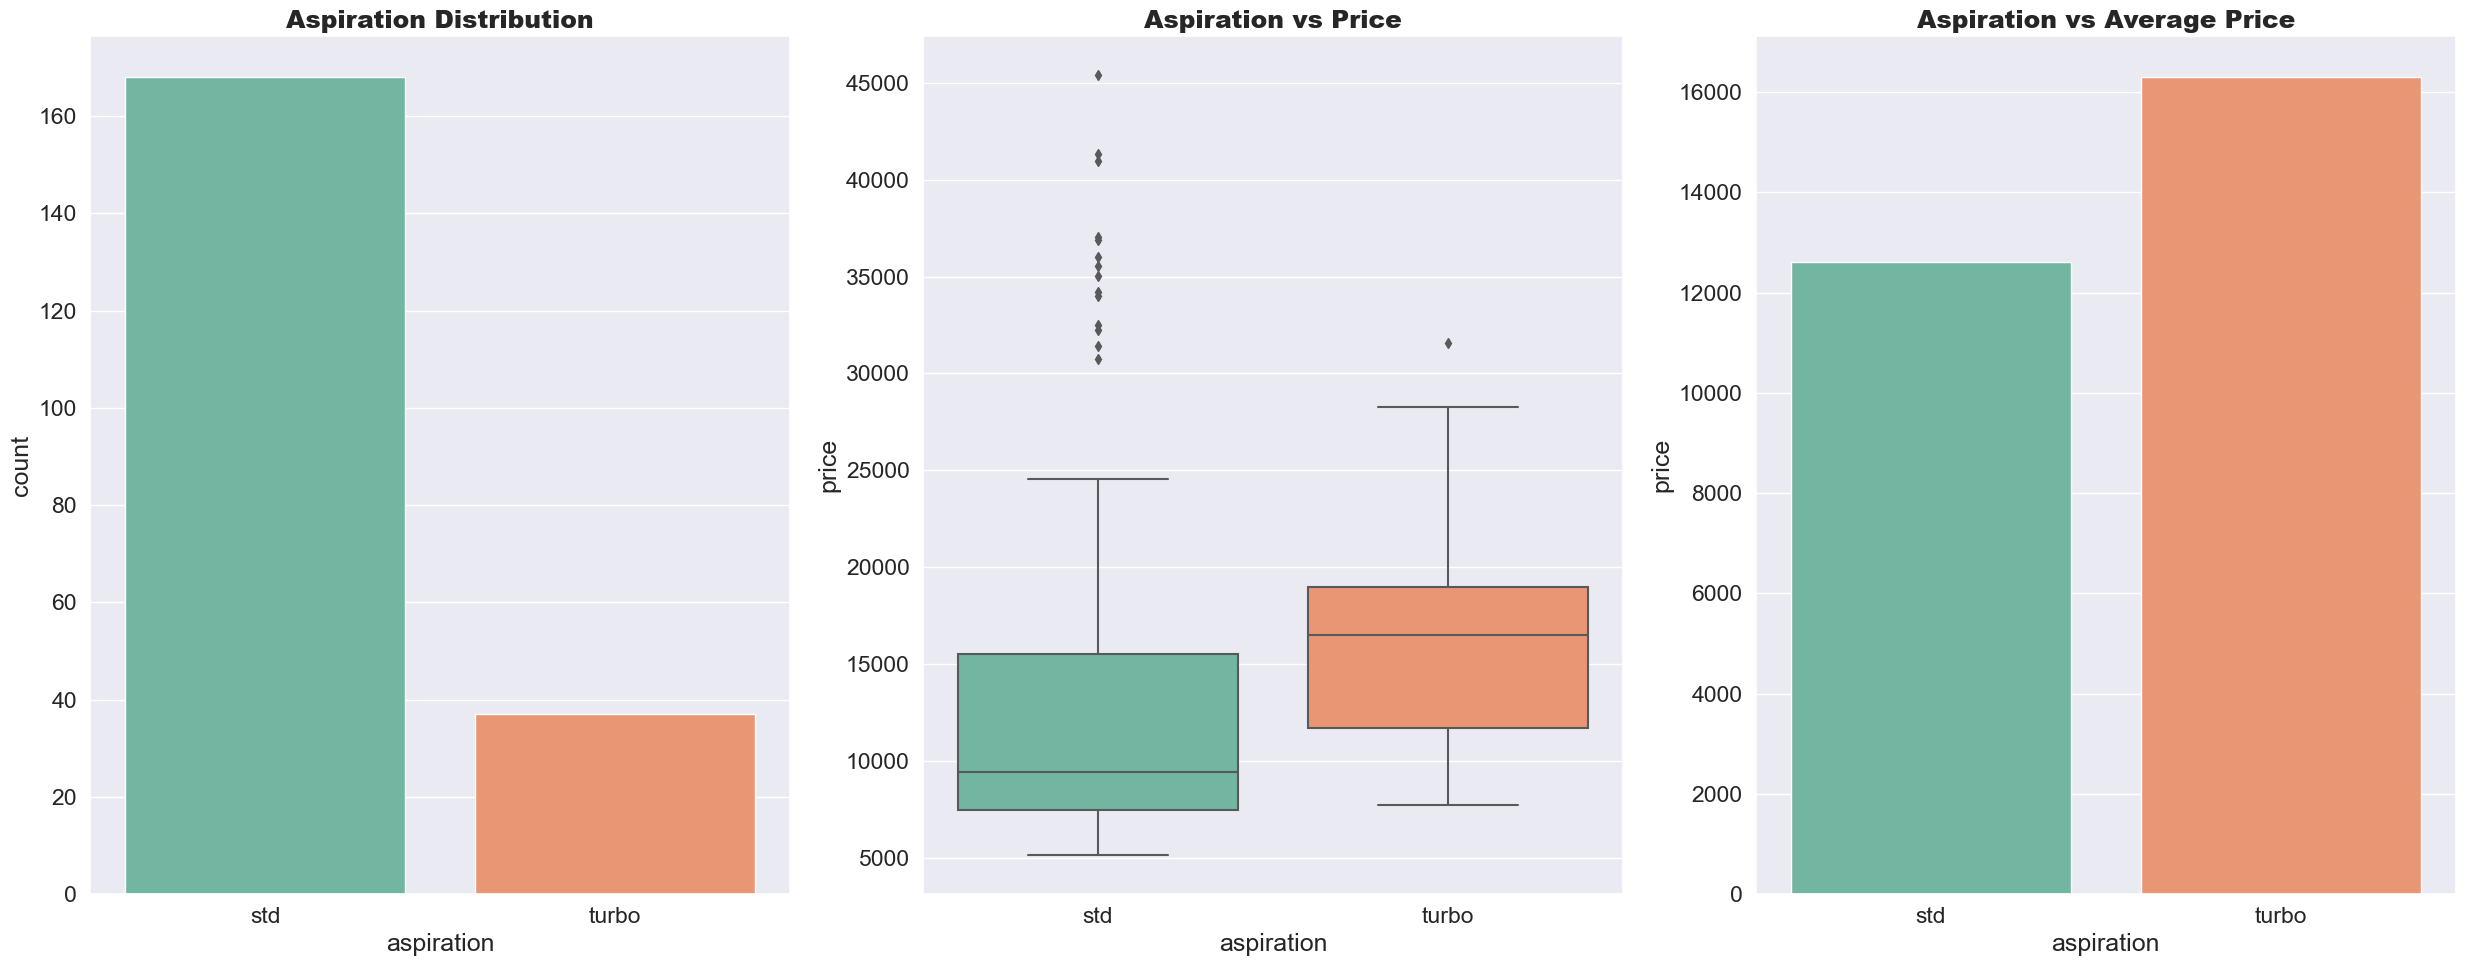

In [84]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
sns.countplot(x='aspiration',data=df,palette="Set2")
plt.title('Aspiration Distribution',fontweight="black",fontsize=18)

plt.subplot(1,3,2)
sns.boxplot(x='aspiration',y='price',data=df,palette="Set2")
plt.title('Aspiration vs Price',fontweight="black",fontsize=18)

plt.subplot(1,3,3)
x=pd.DataFrame(df.groupby('aspiration')['price'].mean())
sns.barplot(x=x.index,y='price',data=x,palette="Set2")
plt.title('Aspiration vs Average Price',fontweight="black",fontsize=18)
plt.tight_layout()

#### Observation:-
1. Cars with STD aspiration are sold more than the turbo.
2. Turbo is more priced and std datapoints have price difference and outliers
3. The average price of turbo is also more than std cars.
4. The outliers present the std states that there r expensive cars in std also.

### 4.Visualization of Doornumber

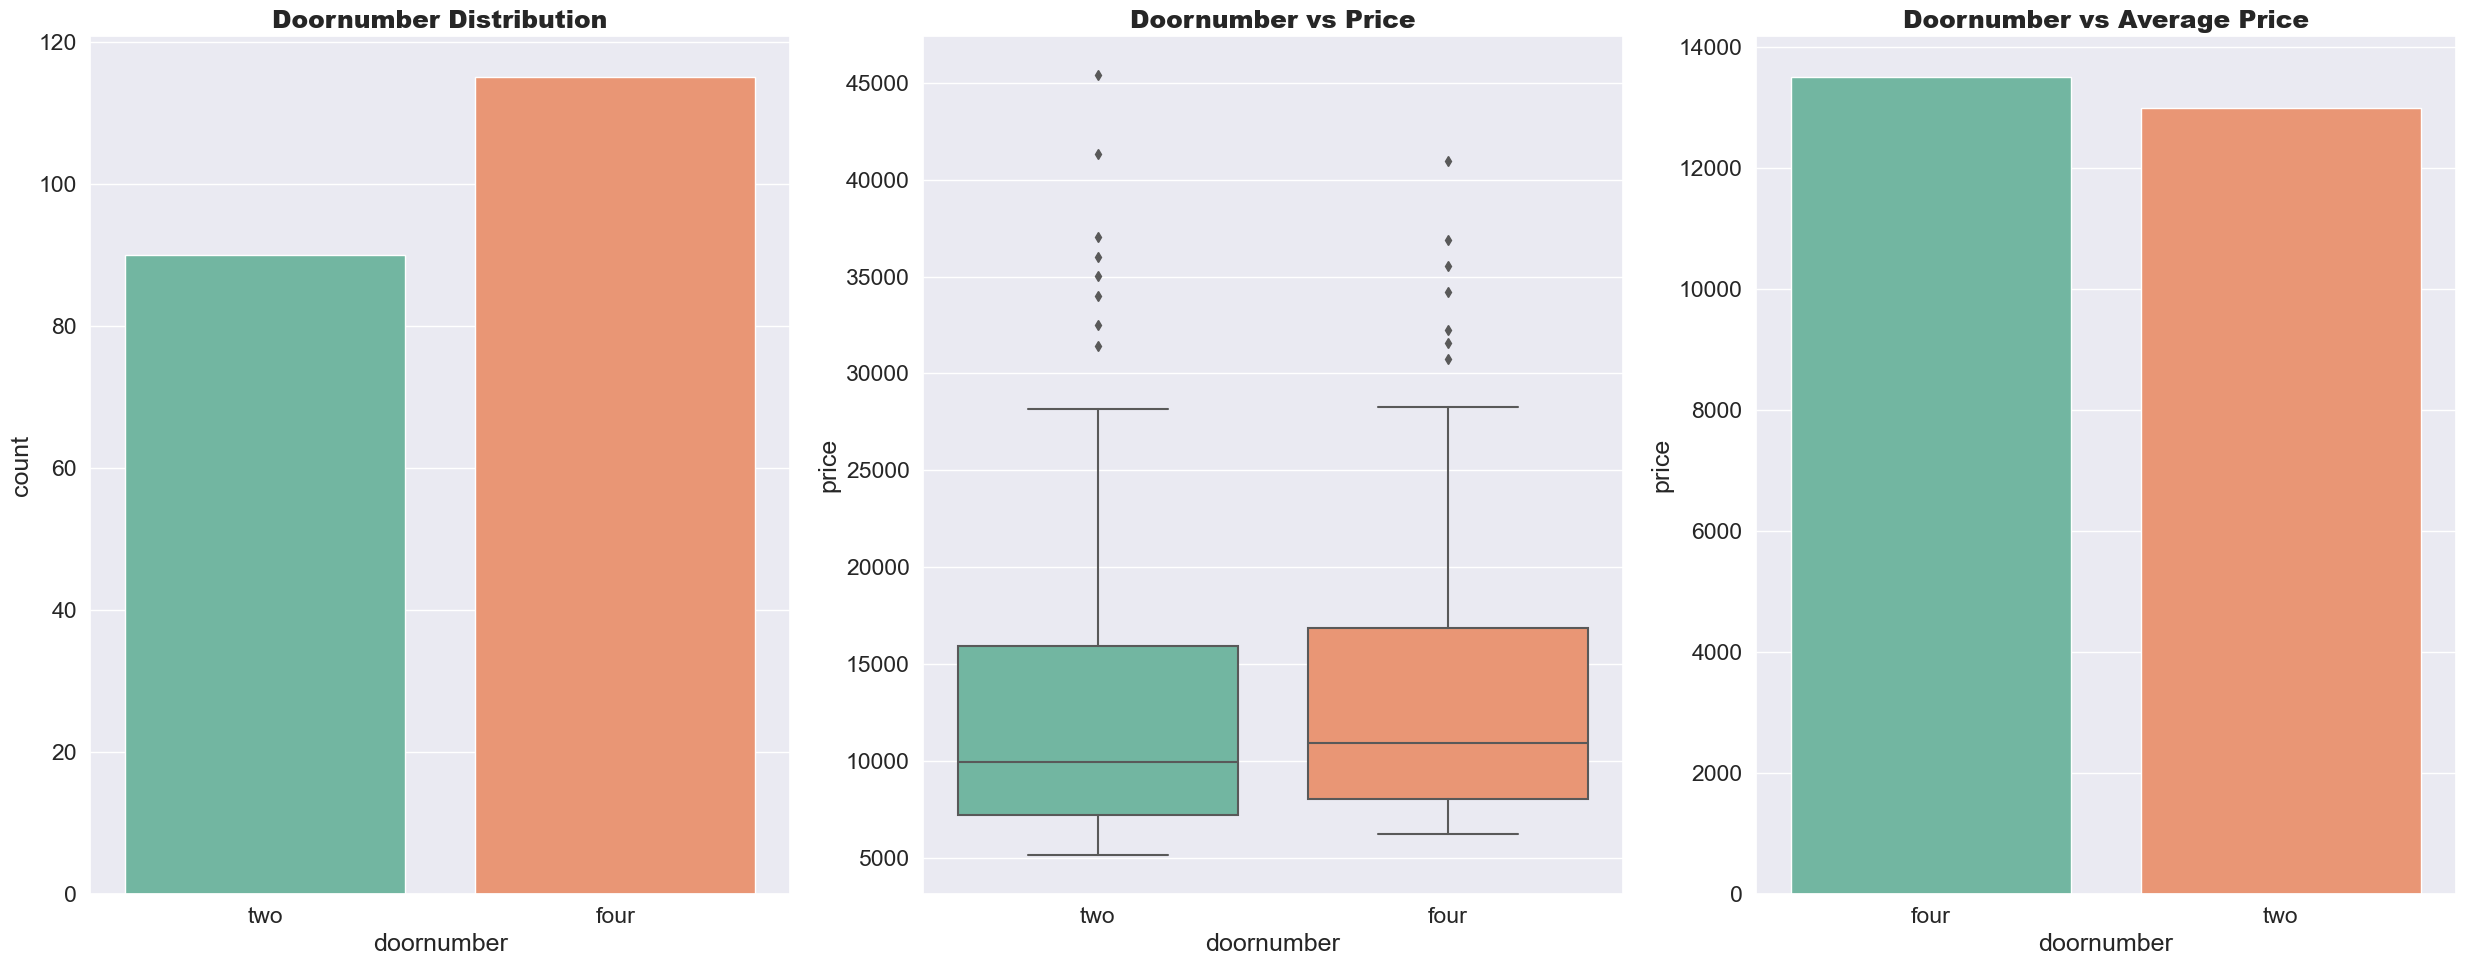

In [114]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
sns.countplot(x='doornumber',data=df,palette="Set2")
plt.title('Doornumber Distribution',fontweight="black",fontsize=18)

plt.subplot(1,3,2)
sns.boxplot(x='doornumber',y='price',data=df,palette="Set2")
plt.title('Doornumber vs Price',fontweight="black",fontsize=18)

plt.subplot(1,3,3)
x=pd.DataFrame(df.groupby('doornumber')['price'].mean())
sns.barplot(x=x.index,y='price',data=x,palette="Set2")
plt.title('Doornumber vs Average Price',fontweight="black",fontsize=18)
plt.tight_layout()

#### Observation:-

1. Cars having Four Doors are mostly sold when compared with cars having Two Doors.
2. Cars having Fours Doors are little more expensive when we compare the avergae price of cars having two doors or four doors.
3. Cars having Four Doors are mostly sold. But there's not a big difference between the sales of cars having four doors & two doors..
4. Outliers prsesent in two doors cars states that some of the cars are are more expensive than the cars having four doors
   Door numbers category is not affecting the price that much.

### 5.Vizualization of carbody with the price

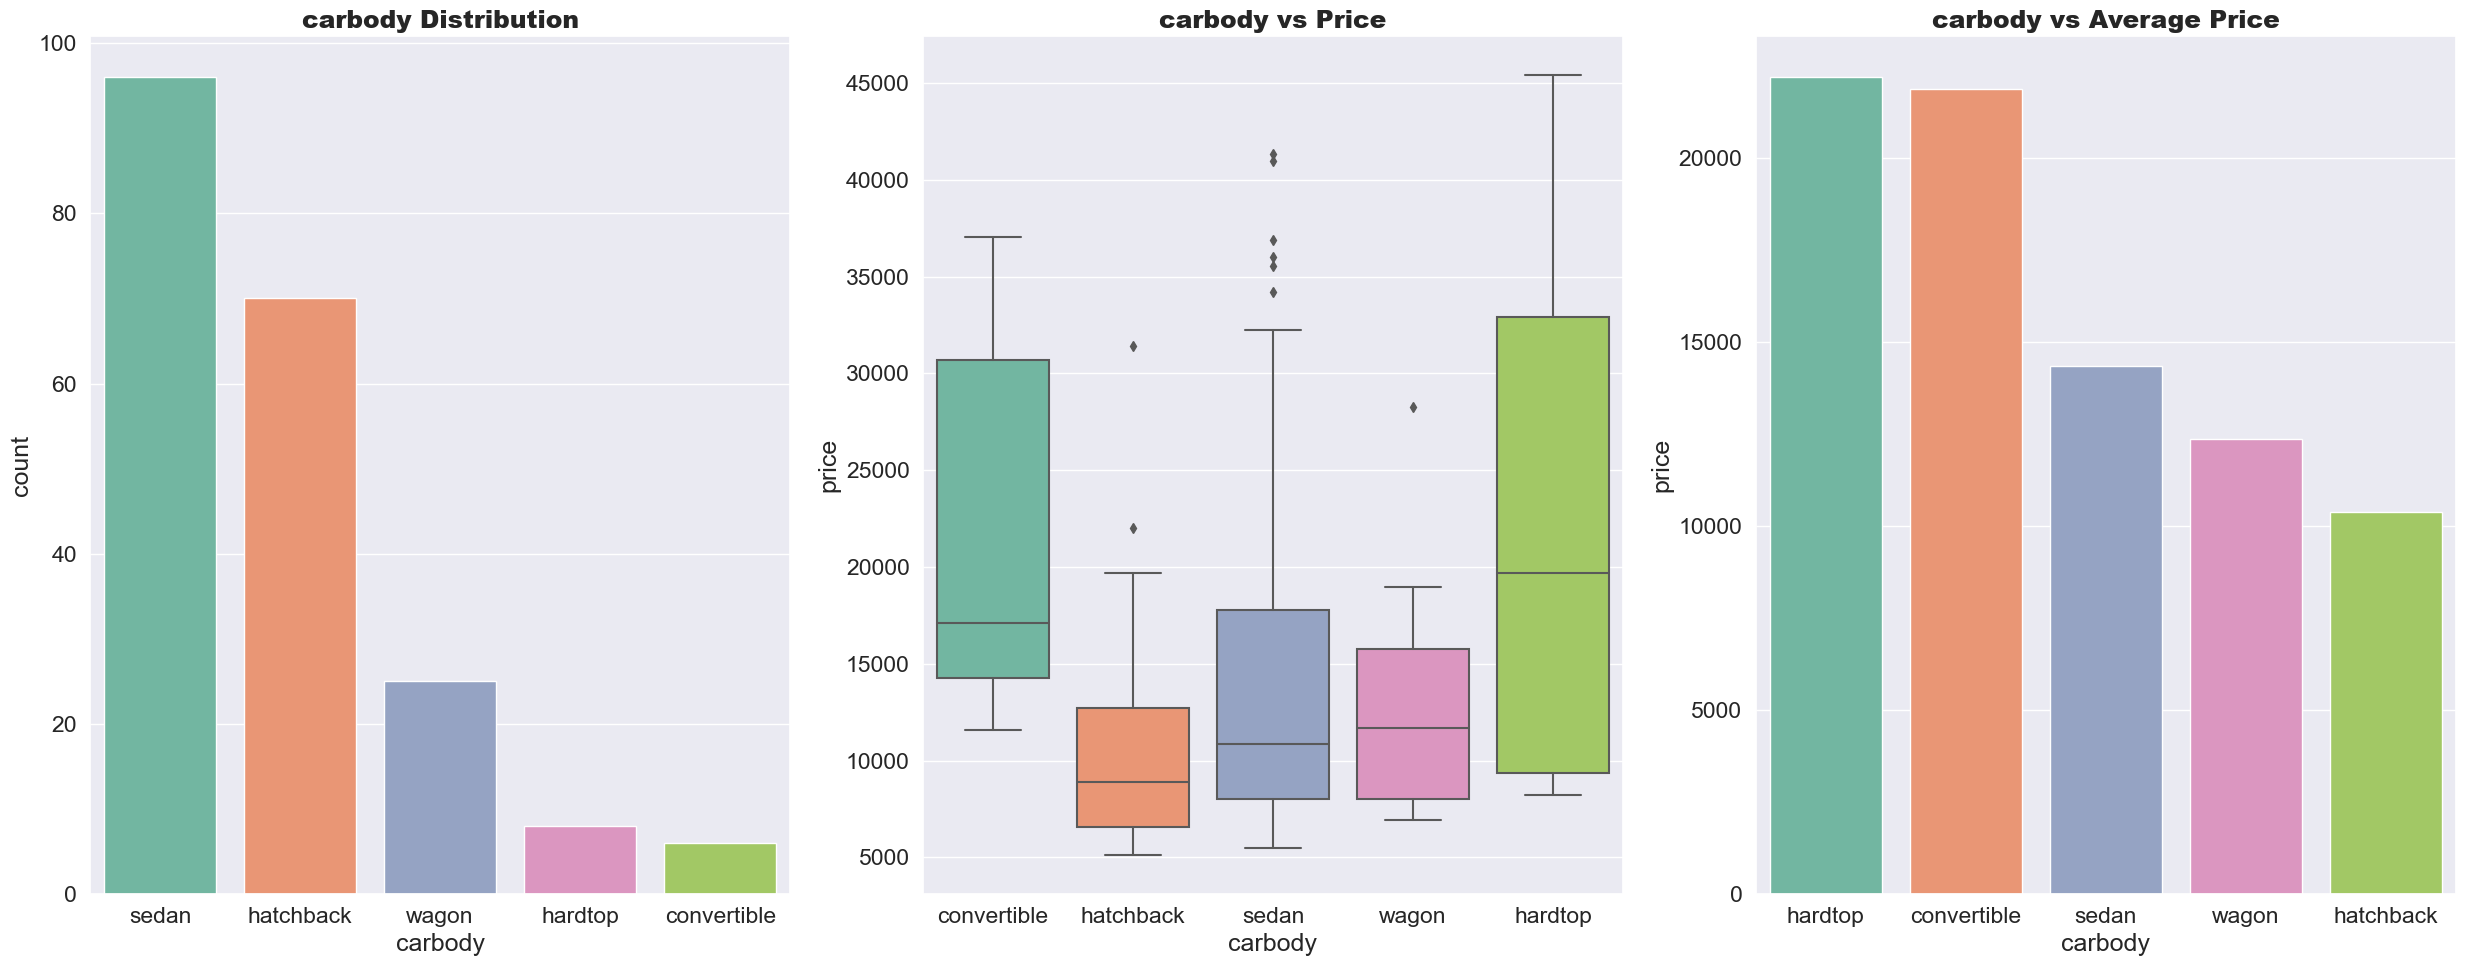

In [115]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
sns.countplot(x='carbody',data=df,palette="Set2",order=df['carbody'].value_counts().index)
plt.title('carbody Distribution',fontweight="black",fontsize=18)

plt.subplot(1,3,2)
sns.boxplot(x='carbody',y='price',data=df,palette="Set2")
plt.title('carbody vs Price',fontweight="black",fontsize=18)

plt.subplot(1,3,3)
x=pd.DataFrame(df.groupby('carbody')['price'].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y='price',data=x,palette="Set2")
plt.title('carbody vs Average Price',fontweight="black",fontsize=18)
plt.tight_layout()

In [133]:
df[df['carbody']=='hardtop']
df[df['carbody']=='convertible']

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
72,73,3,buick,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,50.8,3685,ohcv,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0
128,129,3,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028.0
172,173,2,toyota,gas,std,two,convertible,rwd,front,98.4,176.2,65.6,53.0,2975,ohc,four,146,mpfi,3.62,3.50,9.3,116,4800,24,30,17669.0
189,190,3,volkswagen,gas,std,two,convertible,fwd,front,94.5,159.3,64.2,55.6,2254,ohc,four,109,mpfi,3.19,3.40,8.5,90,5500,24,29,11595.0


#### Observation:-
1. Sedan carbody sold the most
2. HArdtop is priced more,followed by convertible carbody.
3. The average price of hardtop and convertible is alot more than sedan.
4. Convertible & Hardtop body-types are less sold because they are very expensive cars. So most of the customers couldn't prefer it.
5. Cars having Sedan body-type is the third most expensive car. But still its having the most number of car sales. So we can say customers prefer medium price range cars.


### 6.Vizualization of drivewheel

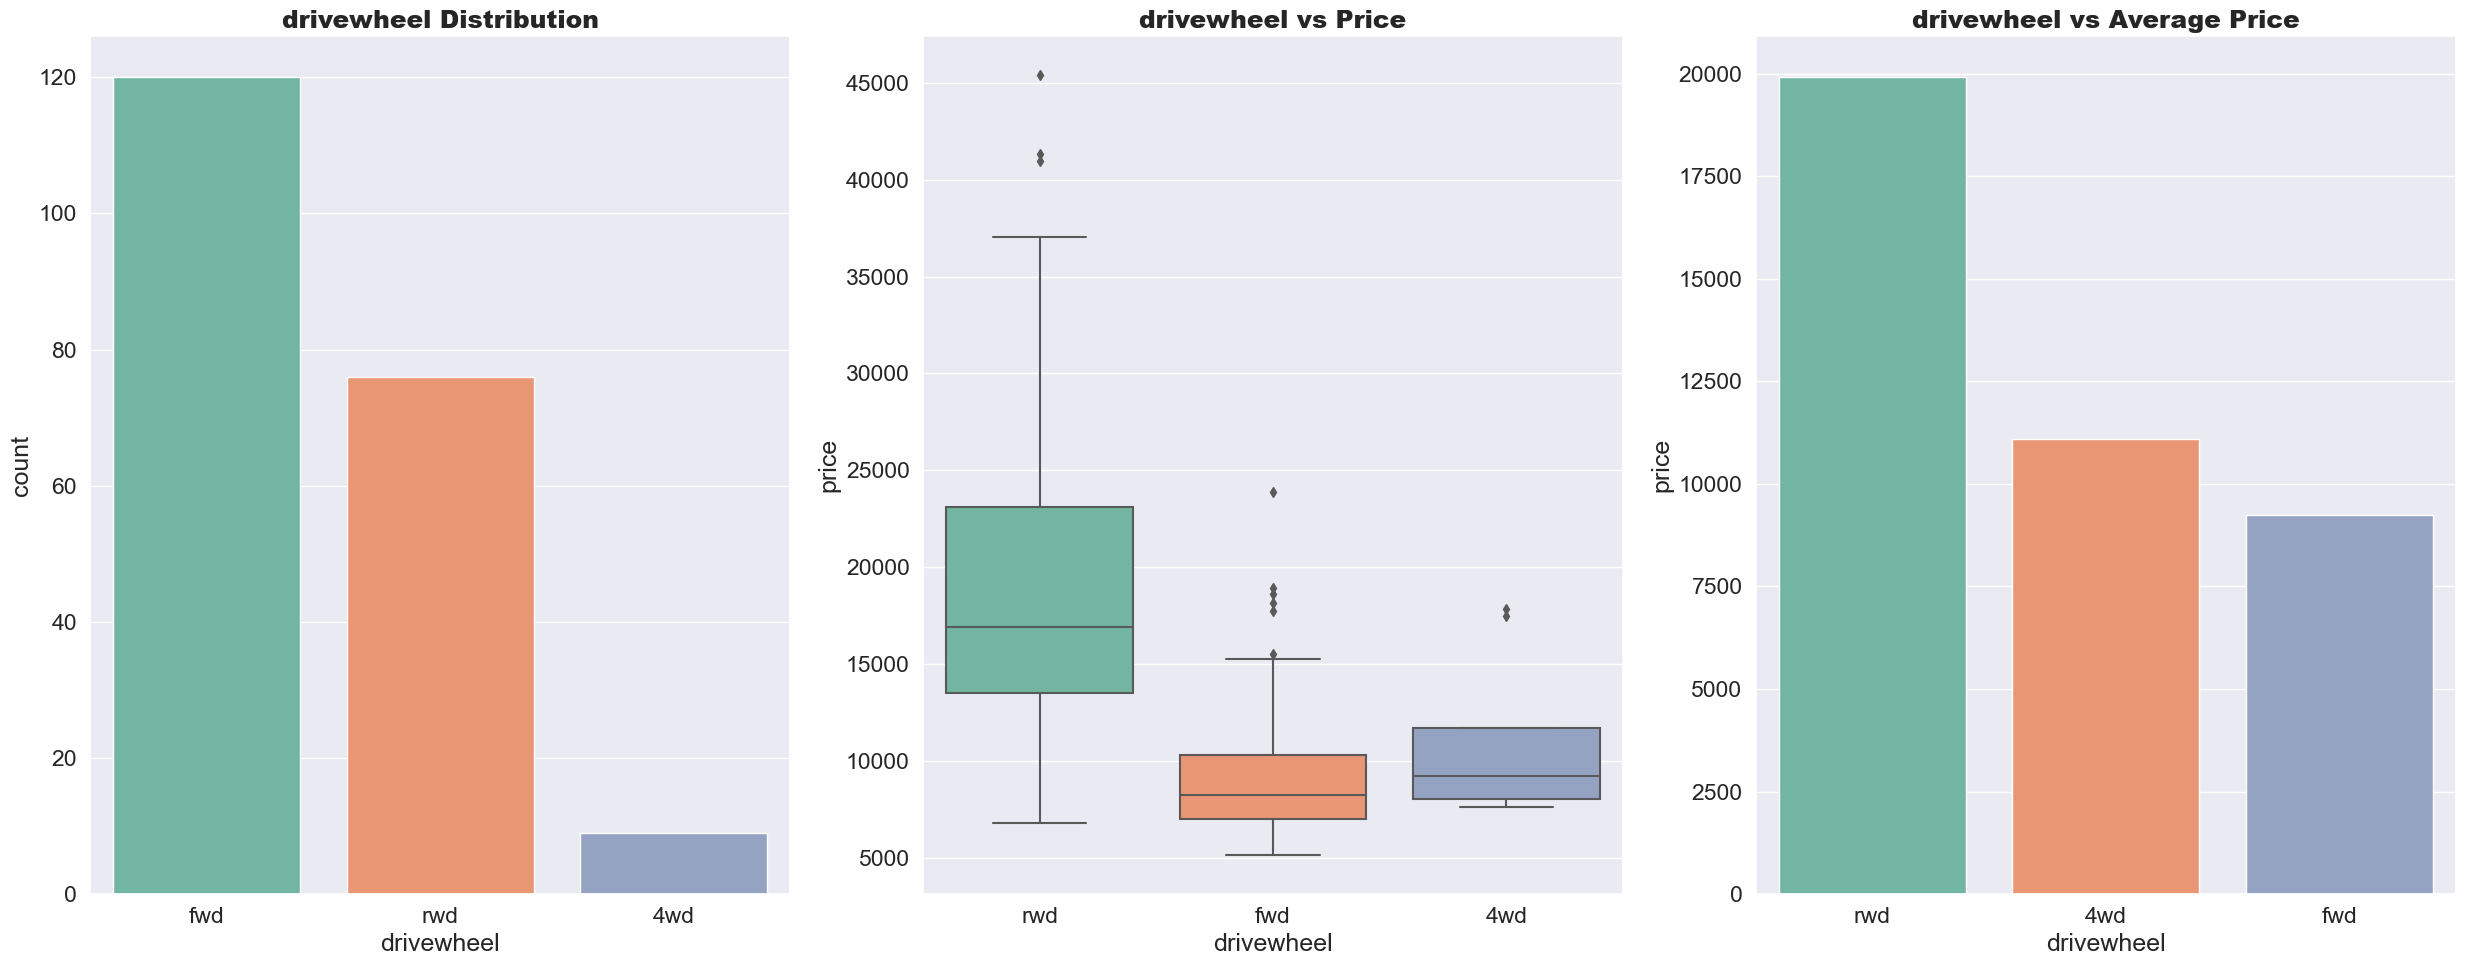

In [116]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
sns.countplot(x='drivewheel',data=df,palette="Set2",order=df['drivewheel'].value_counts().index)
plt.title('drivewheel Distribution',fontweight="black",fontsize=18)

plt.subplot(1,3,2)
sns.boxplot(x='drivewheel',y='price',data=df,palette="Set2")
plt.title('drivewheel vs Price',fontweight="black",fontsize=18)

plt.subplot(1,3,3)
x=pd.DataFrame(df.groupby('drivewheel')['price'].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y='price',data=x,palette="Set2")
plt.title('drivewheel vs Average Price',fontweight="black",fontsize=18)
plt.tight_layout()

#### Observation:-
1. fwd drivewheel is sold the most
2. rwd pricing is the most
3. fwd pricing is less so its sold more.

### 7.Vizualization of enginelocation

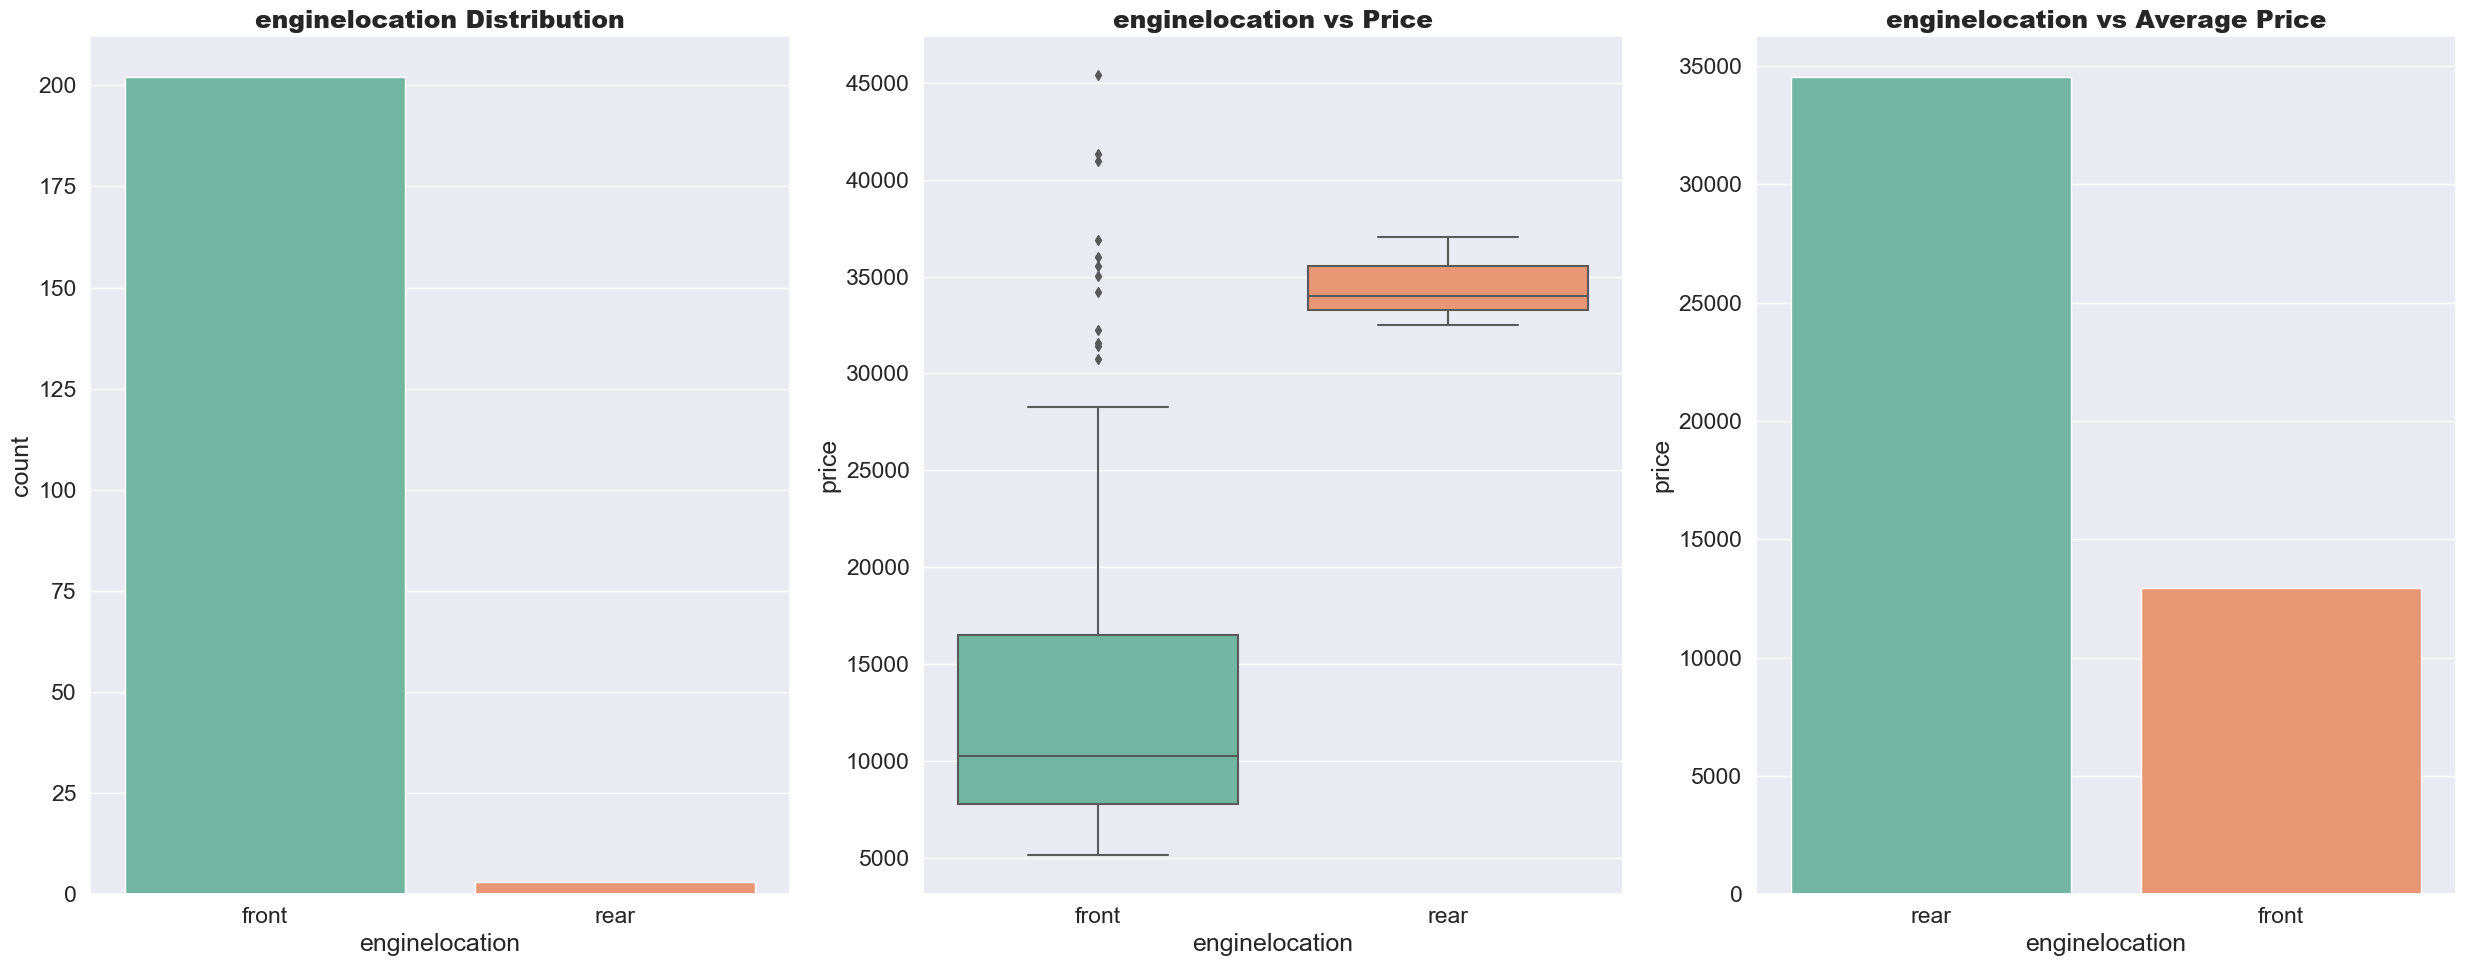

In [108]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
sns.countplot(x='enginelocation',data=df,palette="Set2",order=df['enginelocation'].value_counts().index)
plt.title('enginelocation Distribution',fontweight="black",fontsize=18)

plt.subplot(1,3,2)
sns.boxplot(x='enginelocation',y='price',data=df,palette="Set2")
plt.title('enginelocation vs Price',fontweight="black",fontsize=18)

plt.subplot(1,3,3)
x=pd.DataFrame(df.groupby('enginelocation')['price'].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y='price',data=x,palette="Set2")
plt.title('enginelocation vs Average Price',fontweight="black",fontsize=18)
plt.tight_layout()

In [118]:
df[df["enginelocation"]=="rear"]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
126,127,3,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528.0
127,128,3,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028.0
128,129,3,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028.0


#### Observation:-
1. Front ENgine is sold more.
2. Rear is priced more.
3. Average pricing of rear is alot more than front.

#### Note:-
    Note there are only 3 data-points for the rear category.
    So we can't make any inference of car price when compared with engine location.
    If we want we can drop this feature before training as it may lead to overfitting.

### 8.Vizualization of enginetype

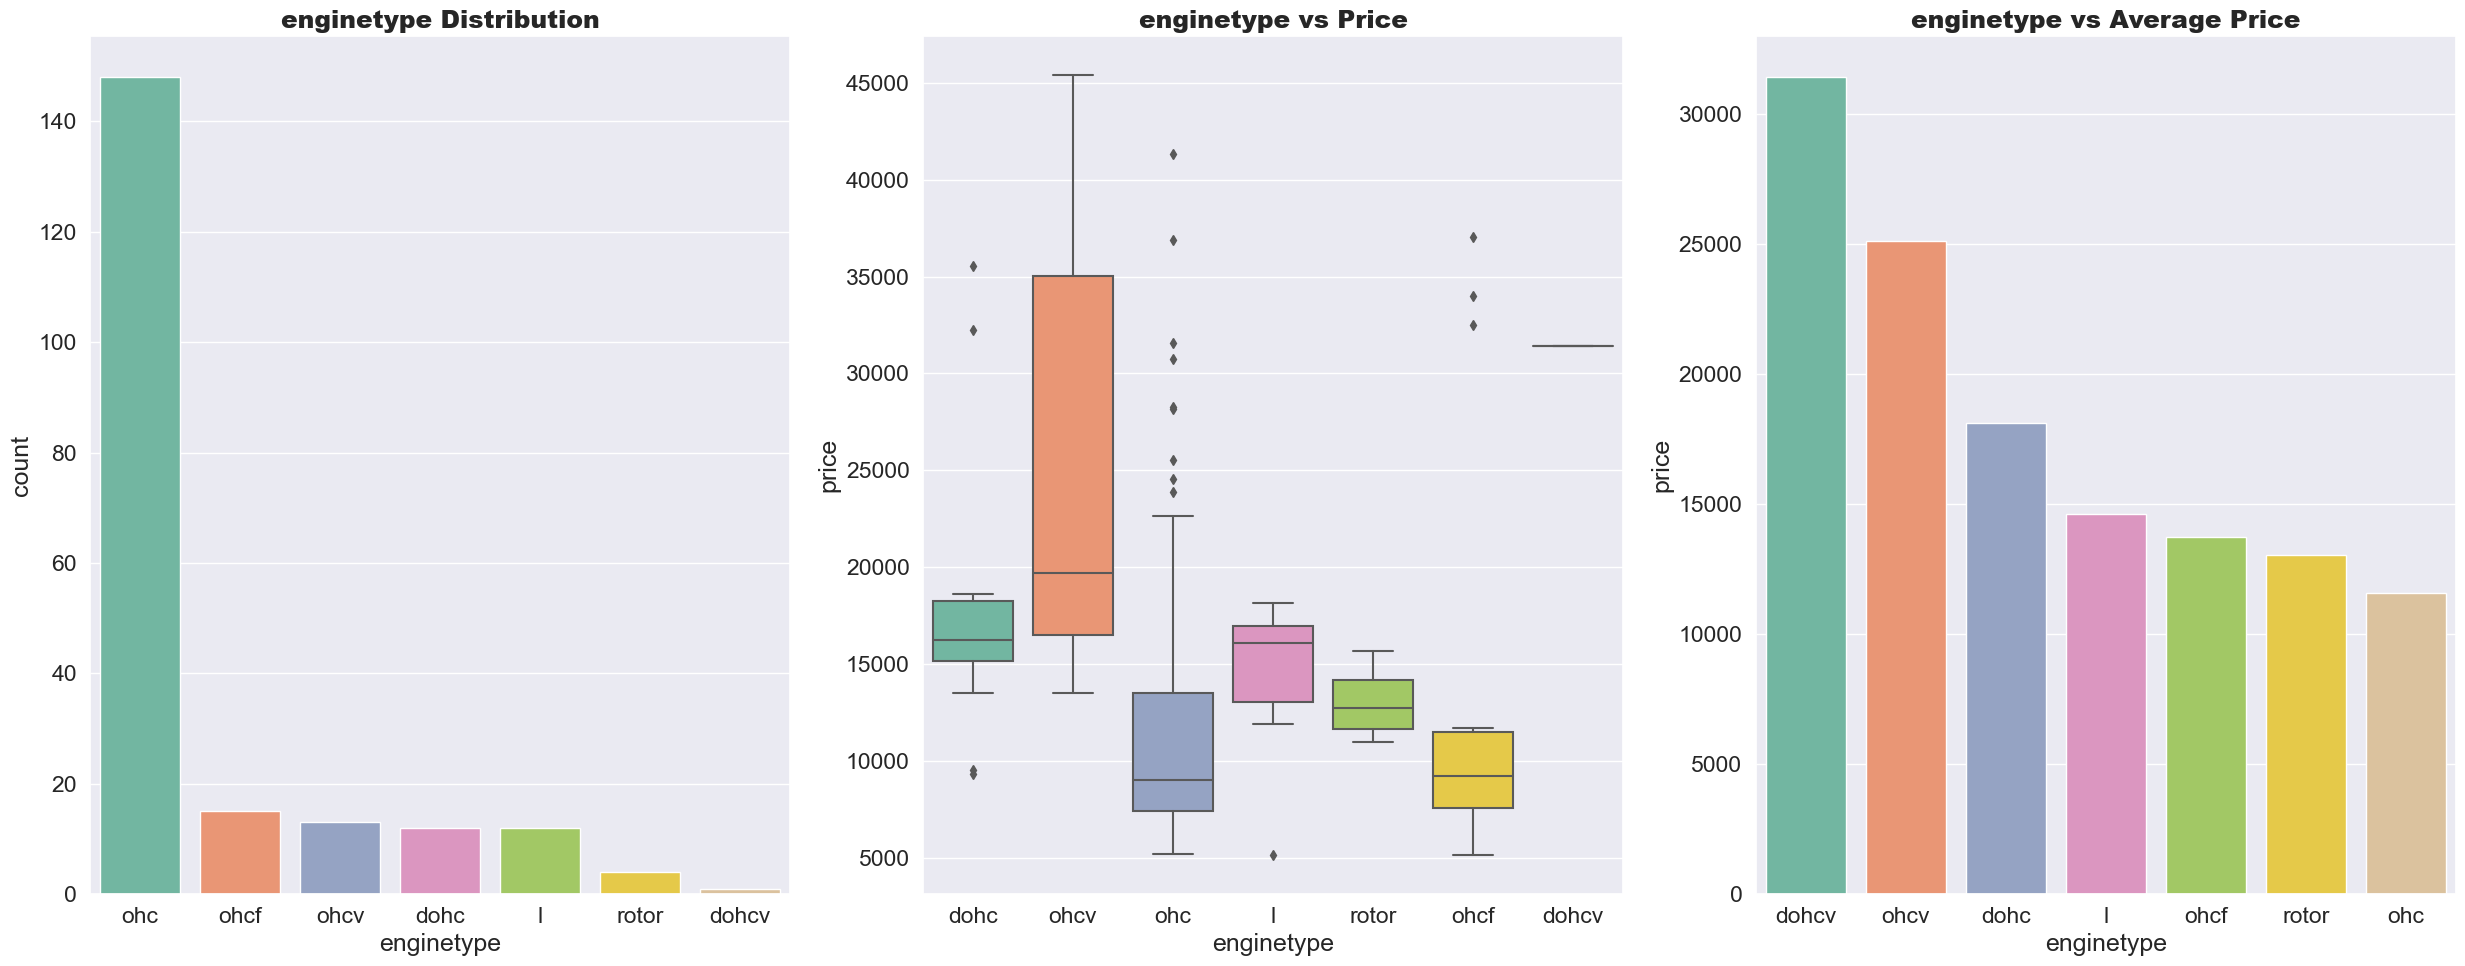

In [117]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
sns.countplot(x='enginetype',data=df,palette="Set2",order=df['enginetype'].value_counts().index)
plt.title('enginetype Distribution',fontweight="black",fontsize=18)

plt.subplot(1,3,2)
sns.boxplot(x='enginetype',y='price',data=df,palette="Set2")
plt.title('enginetype vs Price',fontweight="black",fontsize=18)

plt.subplot(1,3,3)
x=pd.DataFrame(df.groupby('enginetype')['price'].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y='price',data=x,palette="Set2")
plt.title('enginetype vs Average Price',fontweight="black",fontsize=18)
plt.tight_layout()

#### Observation:-
1. Ohc engine type ia sold the most.
2. ohc has the least average price .
3. ohcv has a very high price but its selling curve is less than average.


### 9.Vizualization of cylindernumber

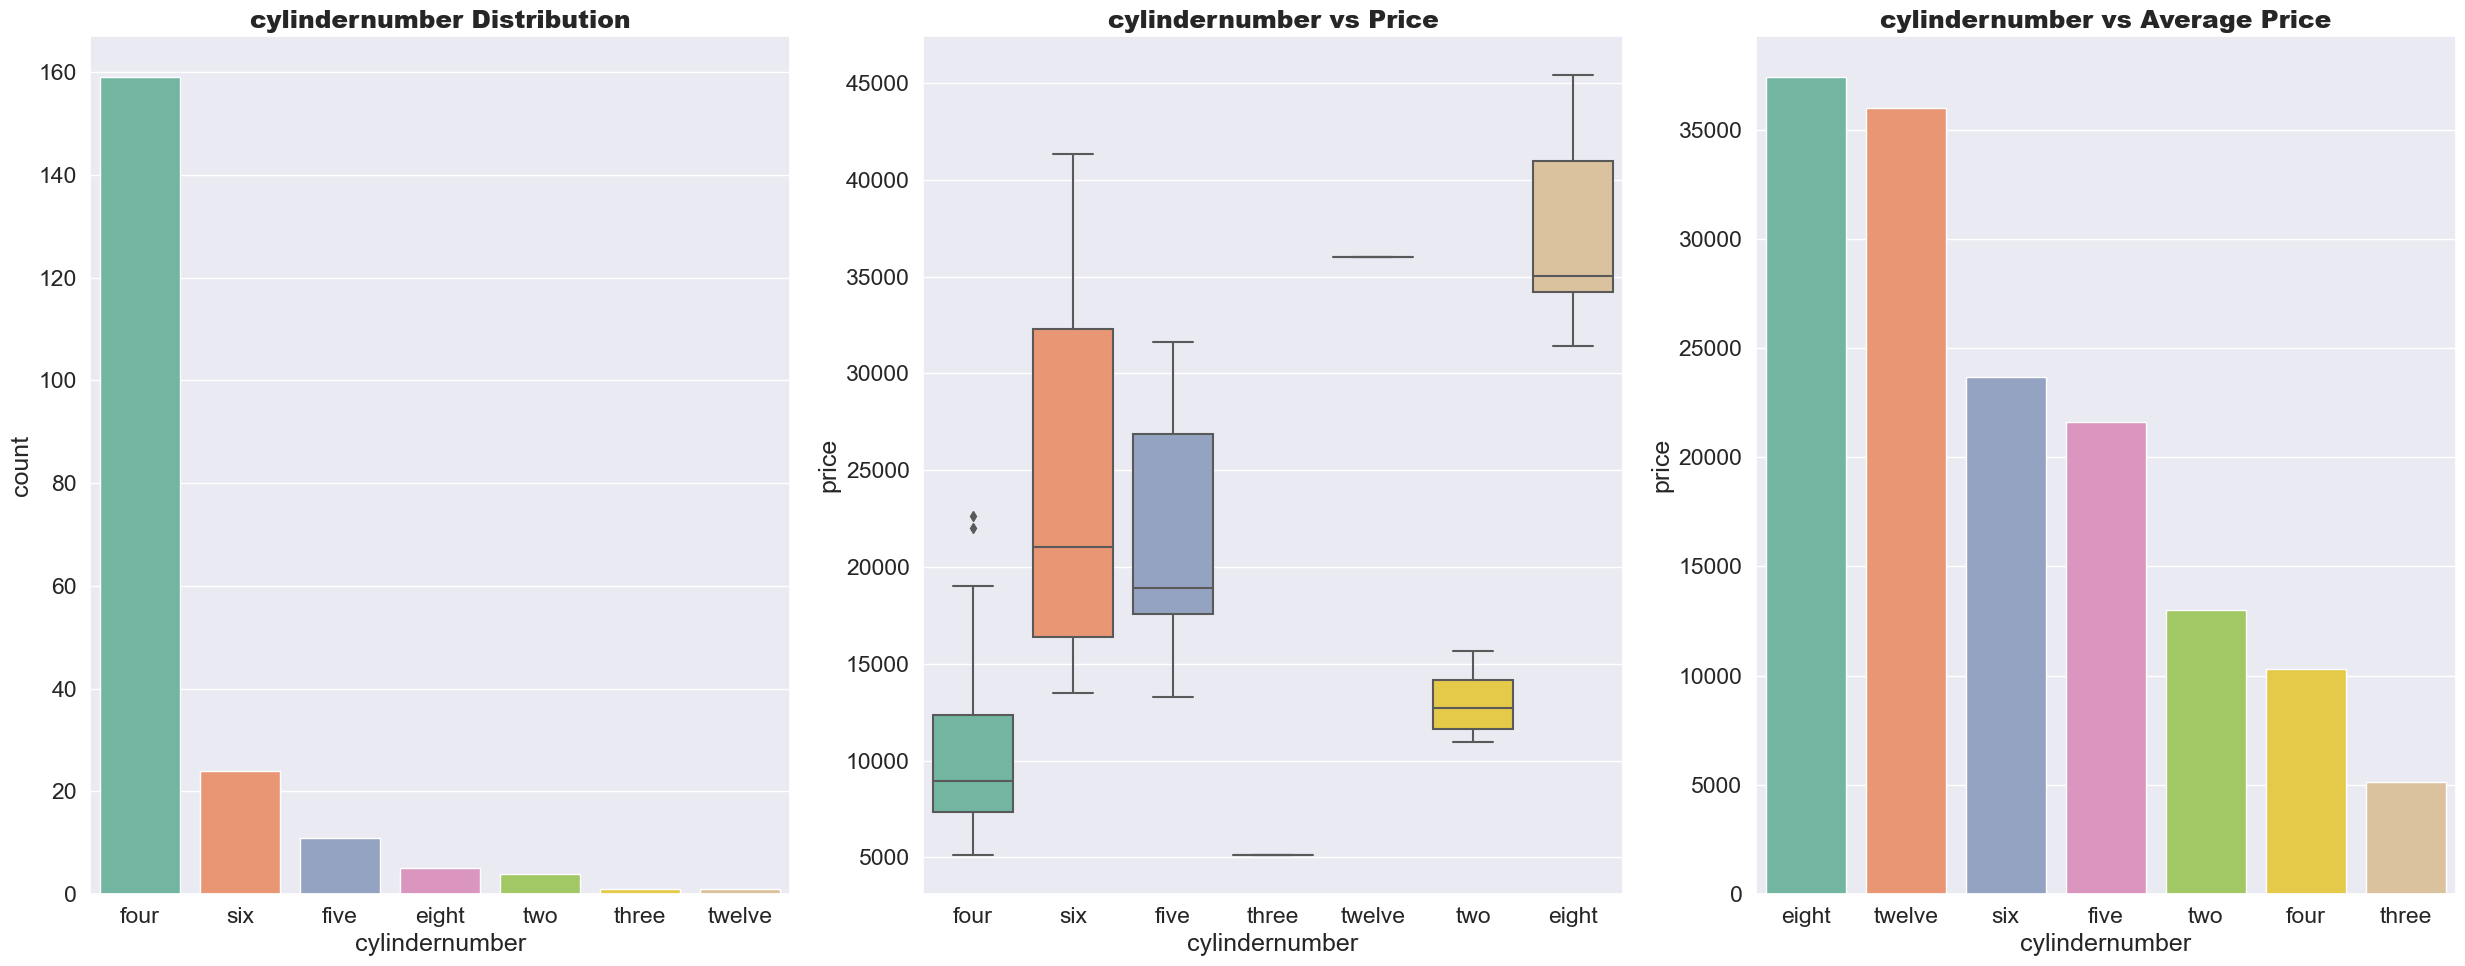

In [111]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
sns.countplot(x='cylindernumber',data=df,palette="Set2",order=df['cylindernumber'].value_counts().index)
plt.title('cylindernumber Distribution',fontweight="black",fontsize=18)

plt.subplot(1,3,2)
sns.boxplot(x='cylindernumber',y='price',data=df,palette="Set2")
plt.title('cylindernumber vs Price',fontweight="black",fontsize=18)

plt.subplot(1,3,3)
x=pd.DataFrame(df.groupby('cylindernumber')['price'].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y='price',data=x,palette="Set2")
plt.title('cylindernumber vs Average Price',fontweight="black",fontsize=18)
plt.tight_layout()

#### Observation:-
1. car with 4 Cylinder are sold the most.
2. Eight cylinder car has the higest pricing.
3. the average pricing of eight and twelve cylinder car is almost same

### 10.Vizualization of fuelsystem

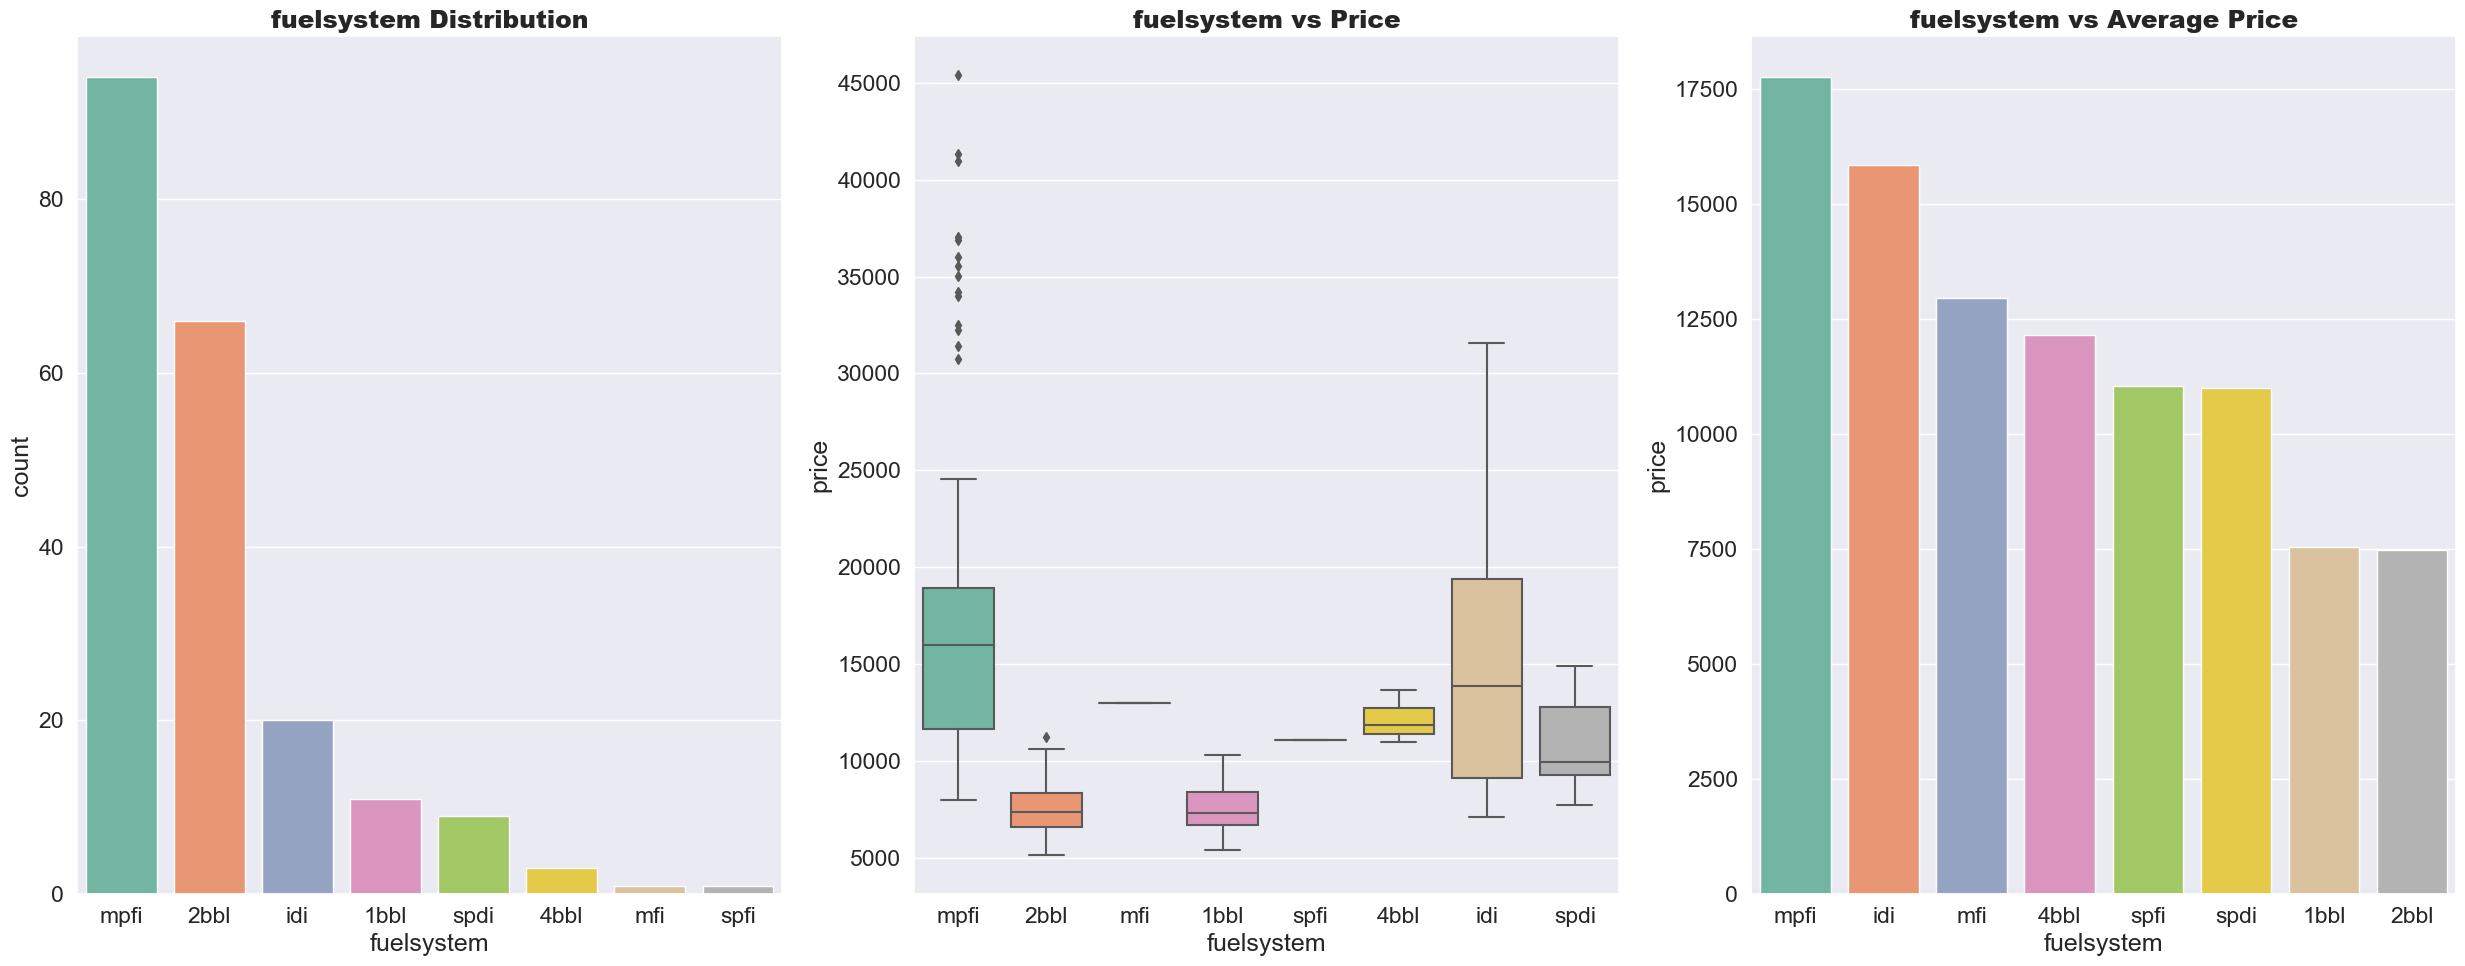

In [112]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
sns.countplot(x='fuelsystem',data=df,palette="Set2",order=df['fuelsystem'].value_counts().index)
plt.title('fuelsystem Distribution',fontweight="black",fontsize=18)

plt.subplot(1,3,2)
sns.boxplot(x='fuelsystem',y='price',data=df,palette="Set2")
plt.title('fuelsystem vs Price',fontweight="black",fontsize=18)

plt.subplot(1,3,3)
x=pd.DataFrame(df.groupby('fuelsystem')['price'].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y='price',data=x,palette="Set2")
plt.title('fuelsystem vs Average Price',fontweight="black",fontsize=18)
plt.tight_layout()

In [128]:
df[df["fuelsystem"]=="mfi" ]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
29,30,3,dodge,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2811,ohc,four,156,mfi,3.6,3.9,7.0,145,5000,19,24,12964.0


In [129]:
df[df["fuelsystem"]=="spfi" ]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
46,47,2,isuzu,gas,std,two,hatchback,rwd,front,96.0,172.6,65.2,51.4,2734,ohc,four,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048.0


#### Observation:-
    Most of the cars are having mpfi & 2bbl fuelsystems.
    Cars having mpfi fuel system are the expensive cars followed by idi fuel system cars.
    There are only one data-point for each mfi and spfi fuelsystem cars. So we can make any further inference

# Vizualization of Numerical data

### 1.Visualization of Symboling

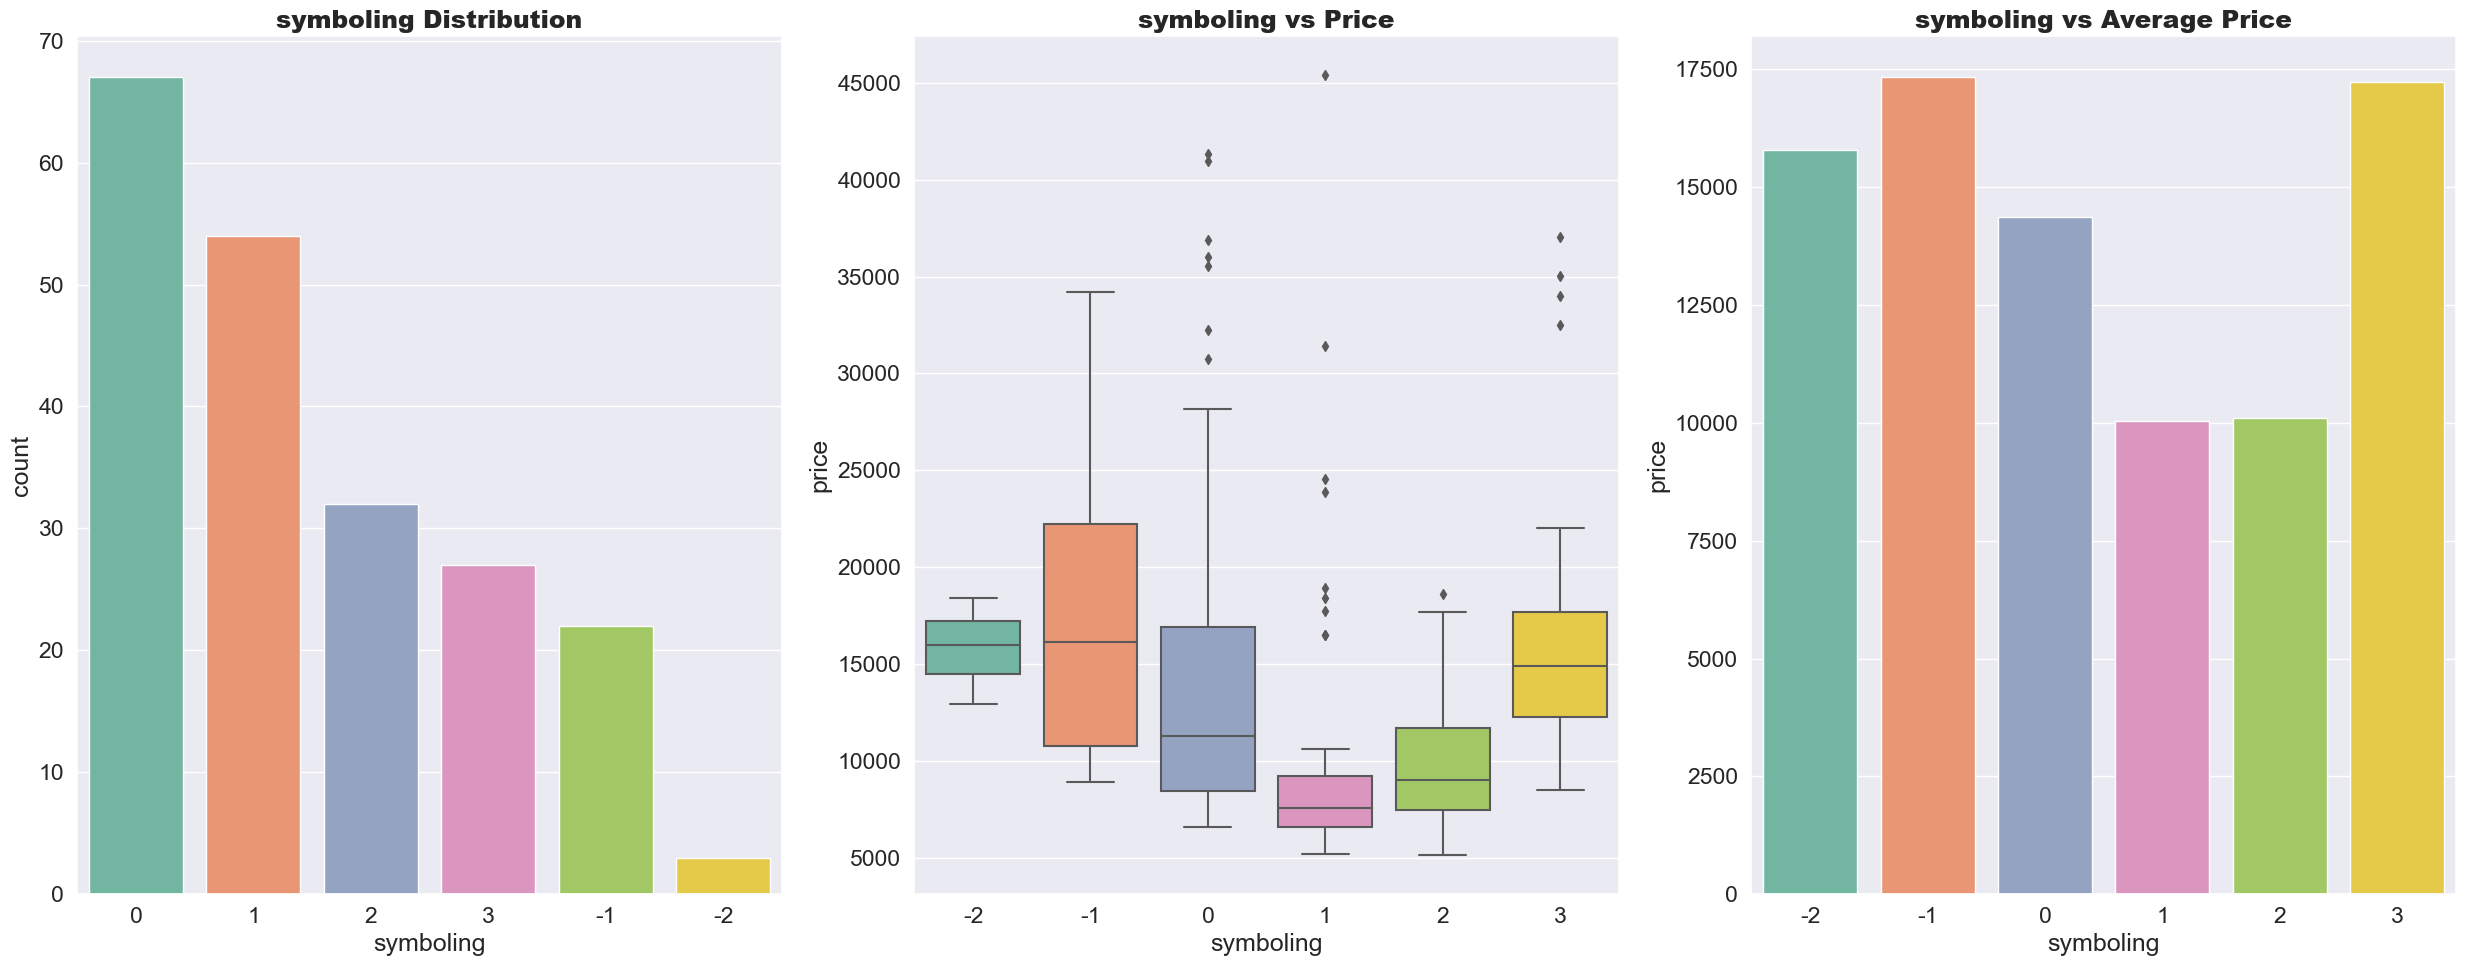

In [136]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
sns.countplot(x='symboling',data=df,palette="Set2",order=df['symboling'].value_counts().index)
plt.title('symboling Distribution',fontweight="black",fontsize=18)

plt.subplot(1,3,2)
sns.boxplot(x='symboling',y='price',data=df,palette="Set2")
plt.title('symboling vs Price',fontweight="black",fontsize=18)

plt.subplot(1,3,3)
x=pd.DataFrame(df.groupby('symboling')['price'].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y='price',data=x,palette="Set2")
plt.title('symboling vs Average Price',fontweight="black",fontsize=18)
plt.tight_layout()

#### Observation:
1. Most of the cars are having mpfi & 2bbl fuelsystems.
2.  having mpfi fuel system are the expensive cars followed by idi fuel system cars.
3. There are only one data-point for each mfi and spfi fuelsystem cars. So we can make any further inference.

### 2.Visualization of carlength,carwidth, carheight againt price

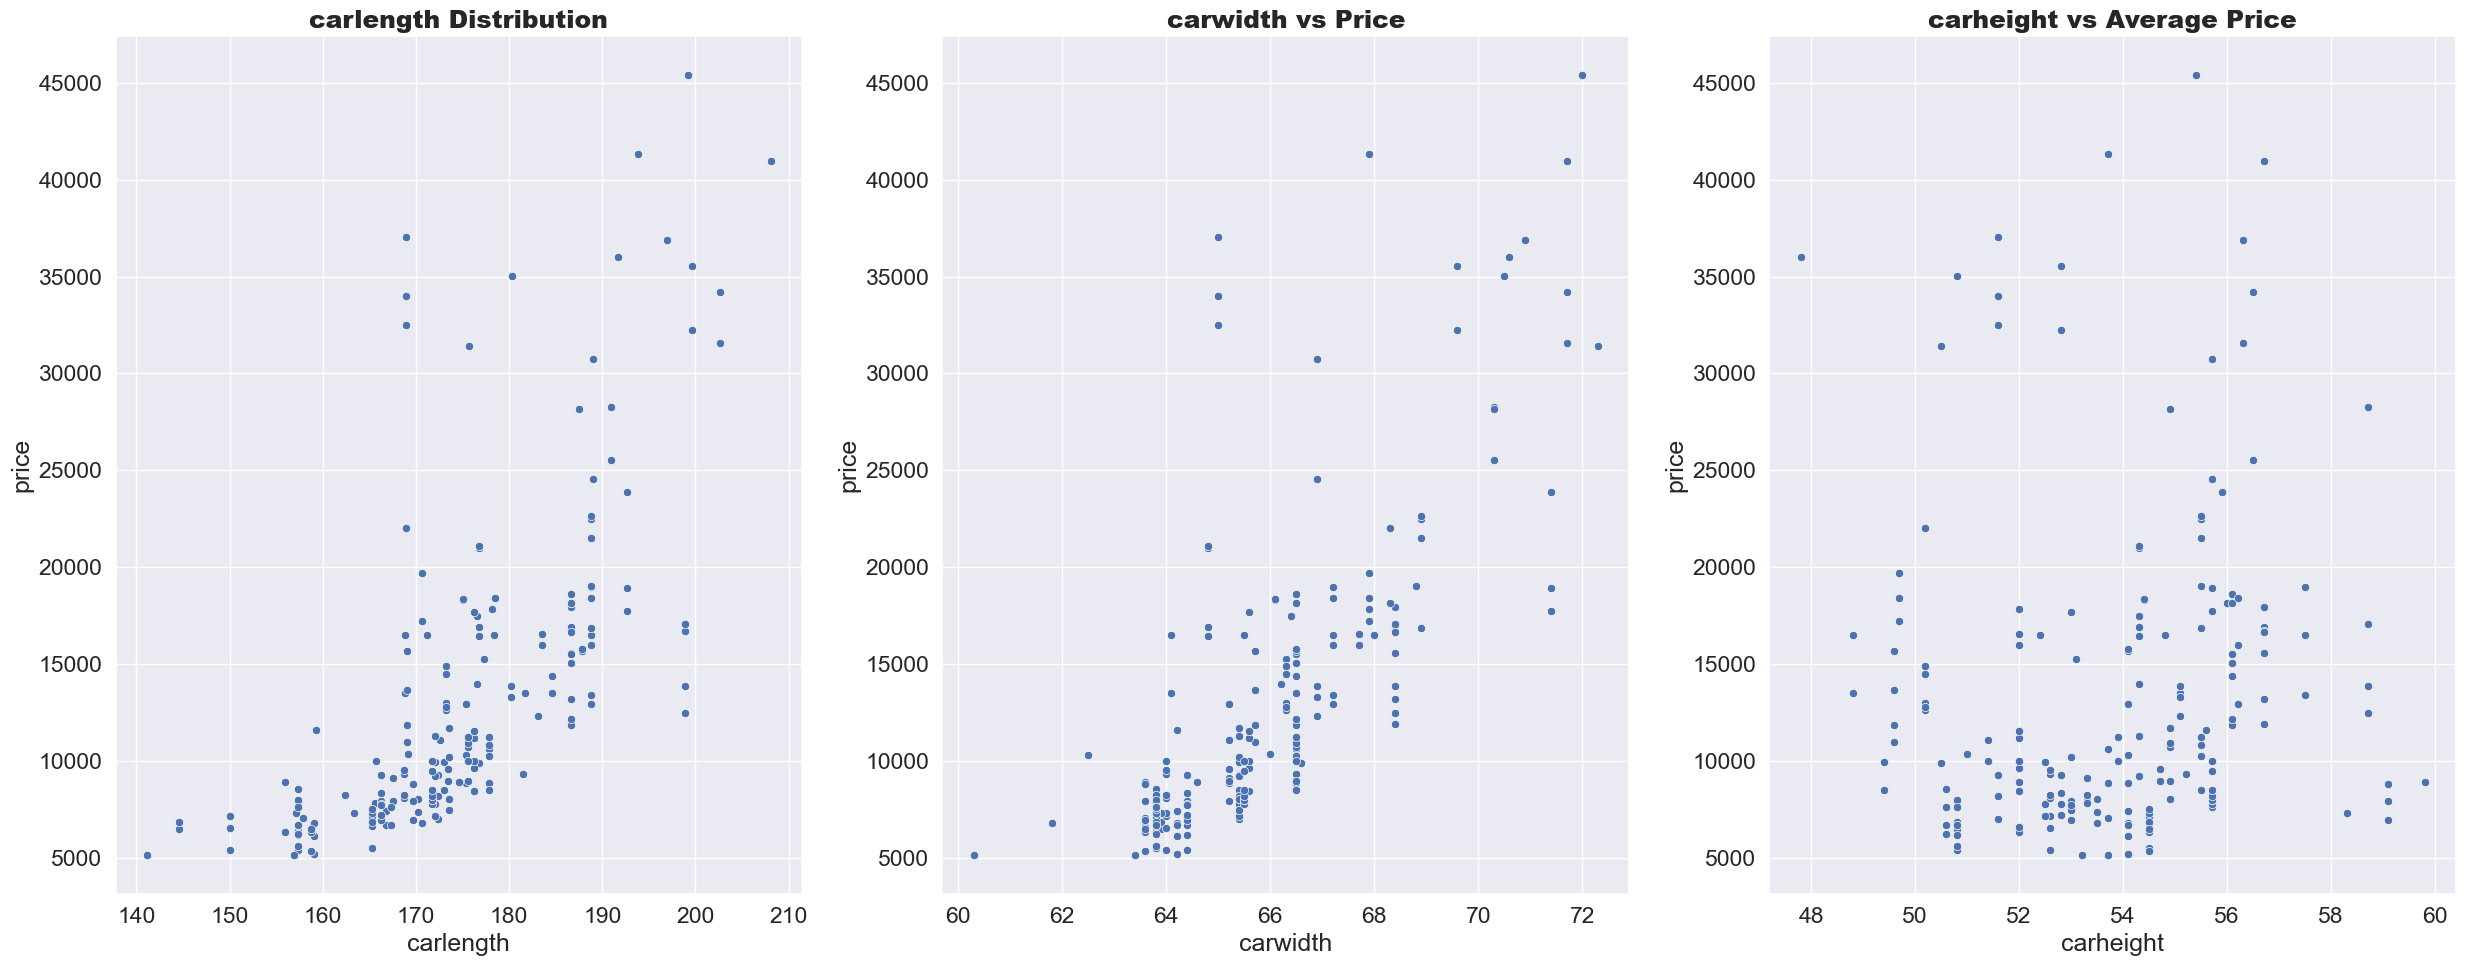

In [180]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
sns.scatterplot(x='carlength',y='price',data=dfn,palette="Set2")
plt.title('carlength Distribution',fontweight="black",fontsize=18)

plt.subplot(1,3,2)
sns.scatterplot(x='carwidth',y='price',data=df,palette="Set2")
plt.title('carwidth vs Price',fontweight="black",fontsize=18)

plt.subplot(1,3,3)
sns.scatterplot(x='carheight',y='price',data=dfn,palette="Set2")
plt.title('carheight vs Average Price',fontweight="black",fontsize=18)
plt.tight_layout()

#### Observation:-
1. We can clearly observe that carlength & carwidth features are highly correlated with the price feature.
2. So we can make an insight that with increment in length & width of the car there is an increment in price too.
3. From carlength vs price we can't make any inference as the data-points are too scattered.
4. Since CarHeight is not affecting Price We can drop this feature

### 3.Visualization of enginesize,boreratio,stroke

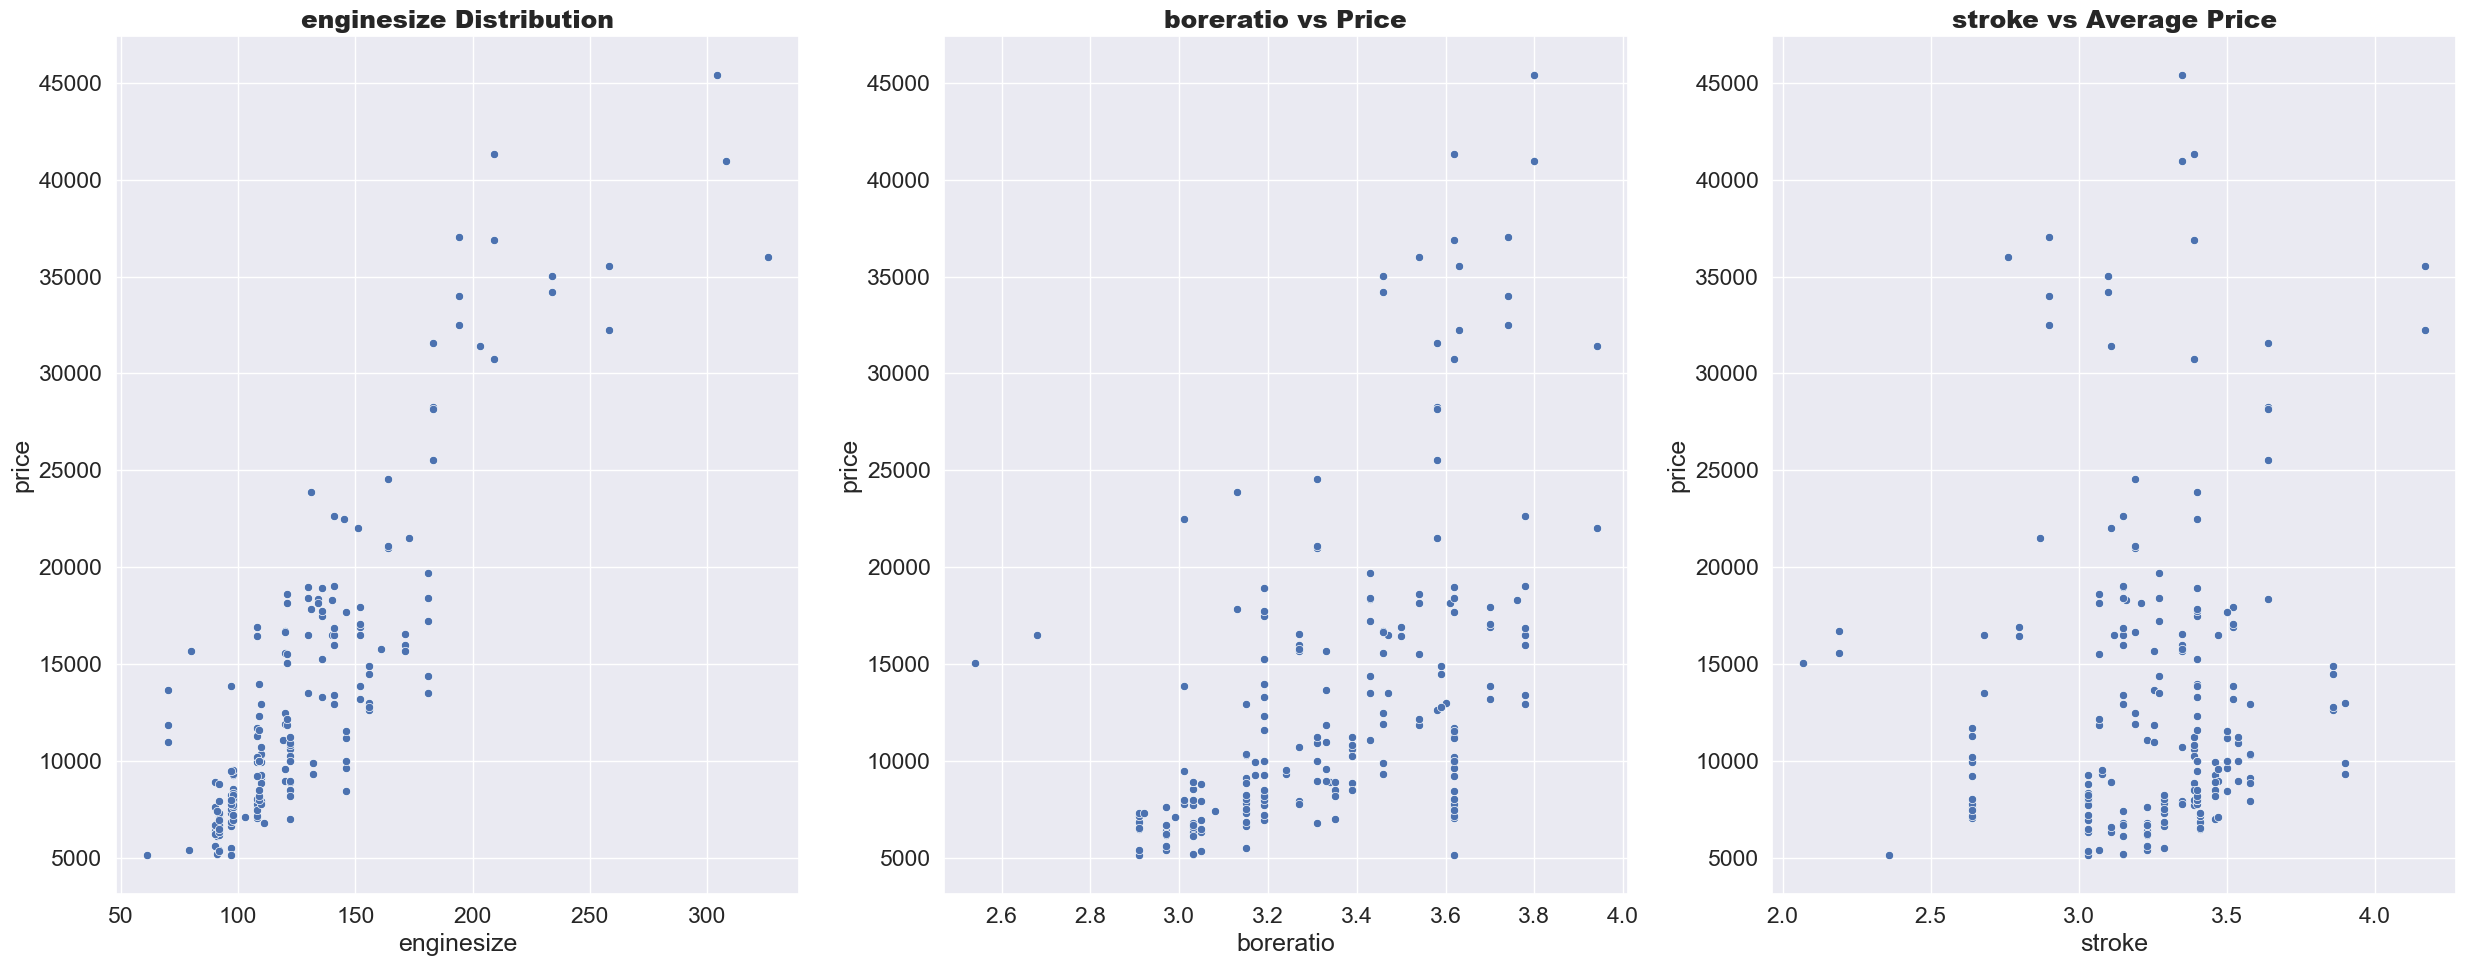

In [183]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
sns.scatterplot(x='enginesize',y='price',data=dfn,palette="Set2")
plt.title('enginesize Distribution',fontweight="black",fontsize=18)

plt.subplot(1,3,2)
sns.scatterplot(x='boreratio',y='price',data=df,palette="Set2")
plt.title('boreratio vs Price',fontweight="black",fontsize=18)

plt.subplot(1,3,3)
sns.scatterplot(x='stroke',y='price',data=dfn,palette="Set2")
plt.title('stroke vs Average Price',fontweight="black",fontsize=18)
plt.tight_layout()

#### Observation:-
1. We can clearly observe that Enginesize is highly correlated with price feature. So we can say with the increment in enginesize the price of the cars increases.
2. From Boreratio vs Price we can observe that the feature is not highly correlated but still there's a correlation between the features. So we can say with increment in boreratio the price of cars increases.
3. From Stroke vs Price we can't make any inference as the data-points are too scattered.
    Since Stroke is not affecting Price that much. We can drop this feature.

### 4.Visualization of compressionratio,horsepower,peakrpm

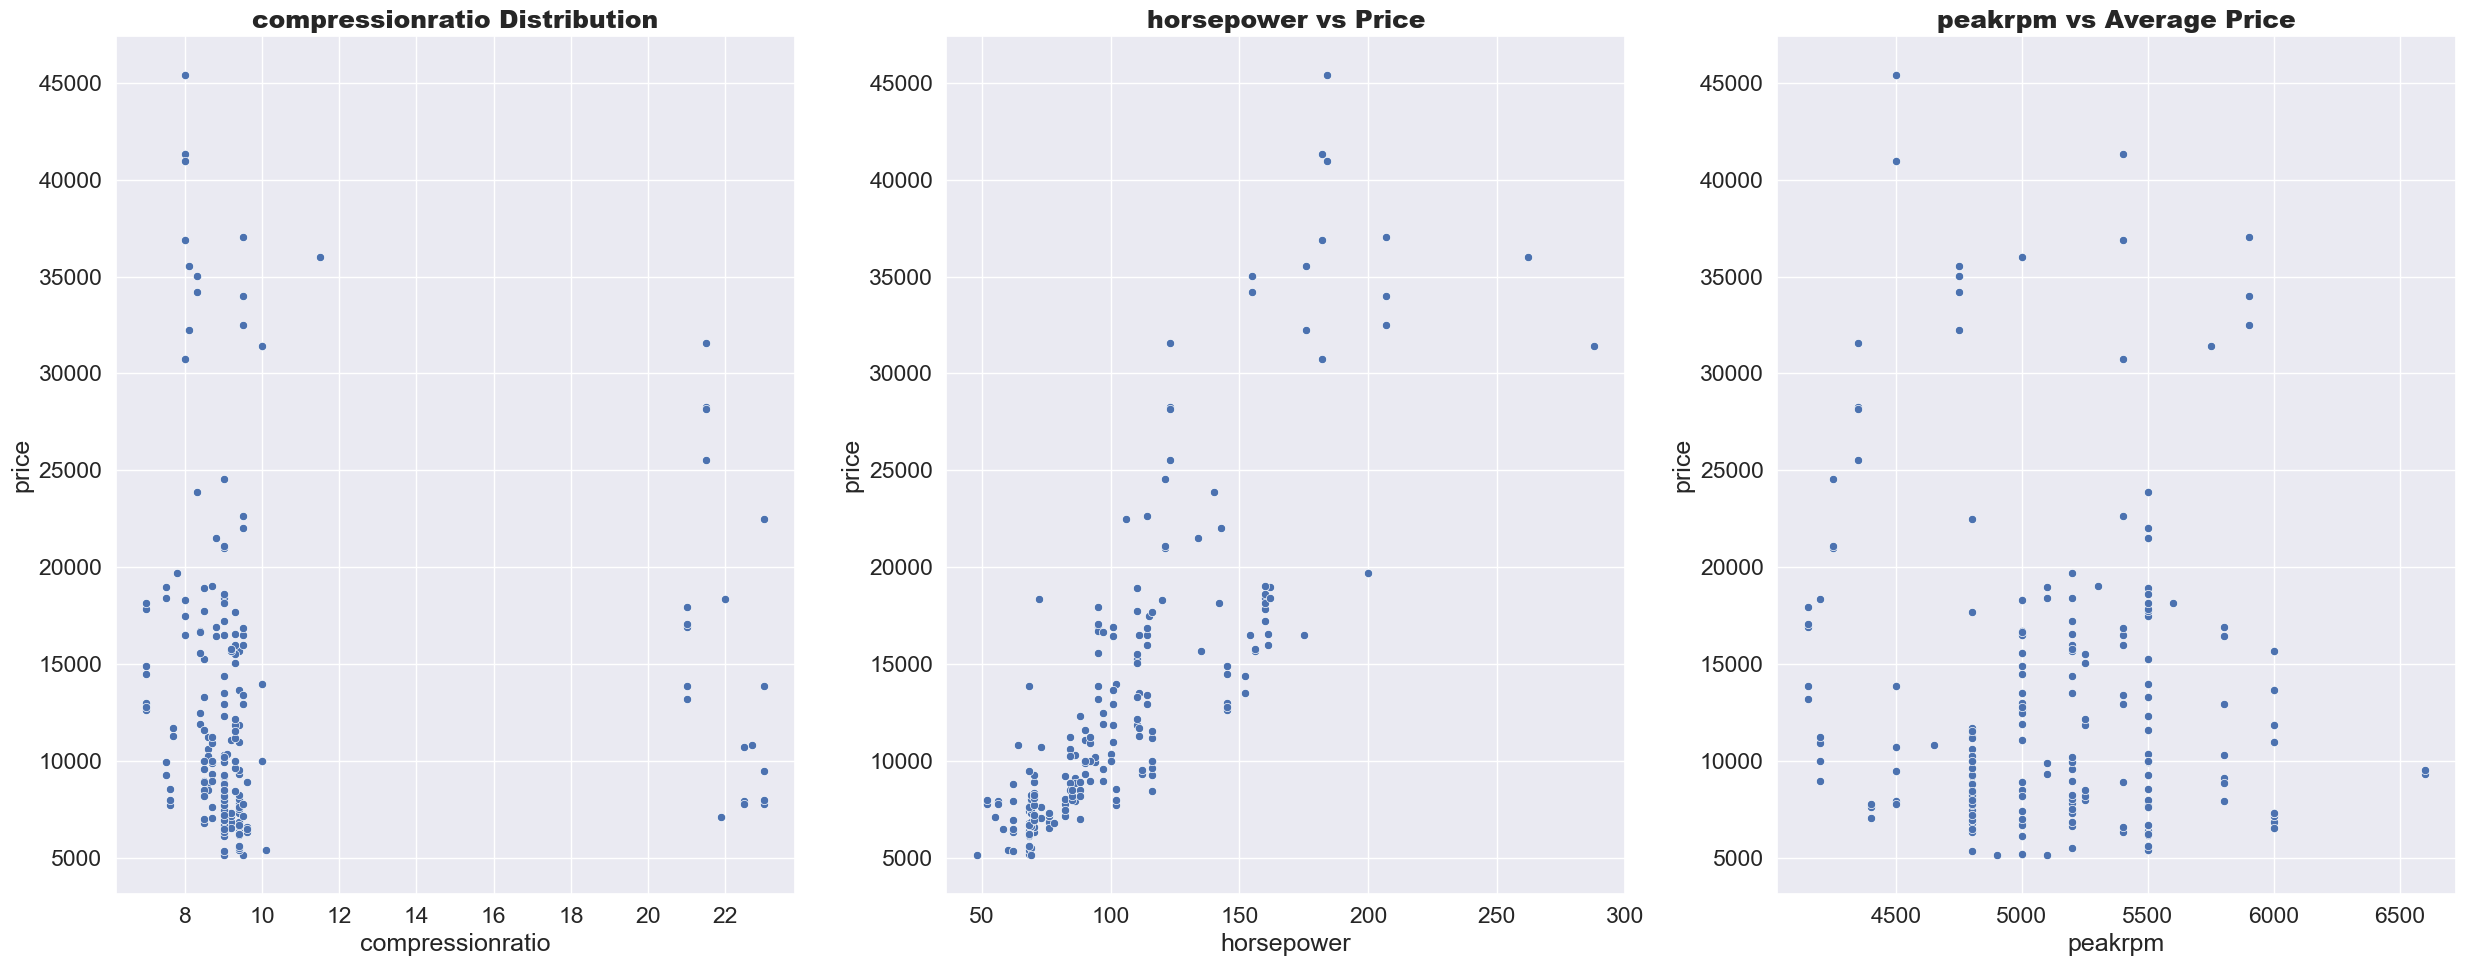

In [187]:
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
sns.scatterplot(x='compressionratio',y='price',data=dfn,palette="Set2")
plt.title('compressionratio Distribution',fontweight="black",fontsize=18)

plt.subplot(1,3,2)
sns.scatterplot(x='horsepower',y='price',data=df,palette="Set2")
plt.title('horsepower vs Price',fontweight="black",fontsize=18)

plt.subplot(1,3,3)
sns.scatterplot(x='peakrpm',y='price',data=dfn,palette="Set2")
plt.title('peakrpm vs Average Price',fontweight="black",fontsize=18)
plt.tight_layout()

#### Observation:-
1. We can clearly observe that Horsepower is highly correlated with Price. So we can say with the increment in Horsepower the price of cars also increases.
2. From Compressionratio vs Price & Peakrpm vs Price visuals we can't make any inference as the data-points are too scattered.
3. SInce Compressionratio & Peakrpm is not affecting price. So we can drop this features.

### 5. Visualizing "WheelBase" & "Curbweight" Features

Text(0.5, 1.0, 'Curbweight vs Price')

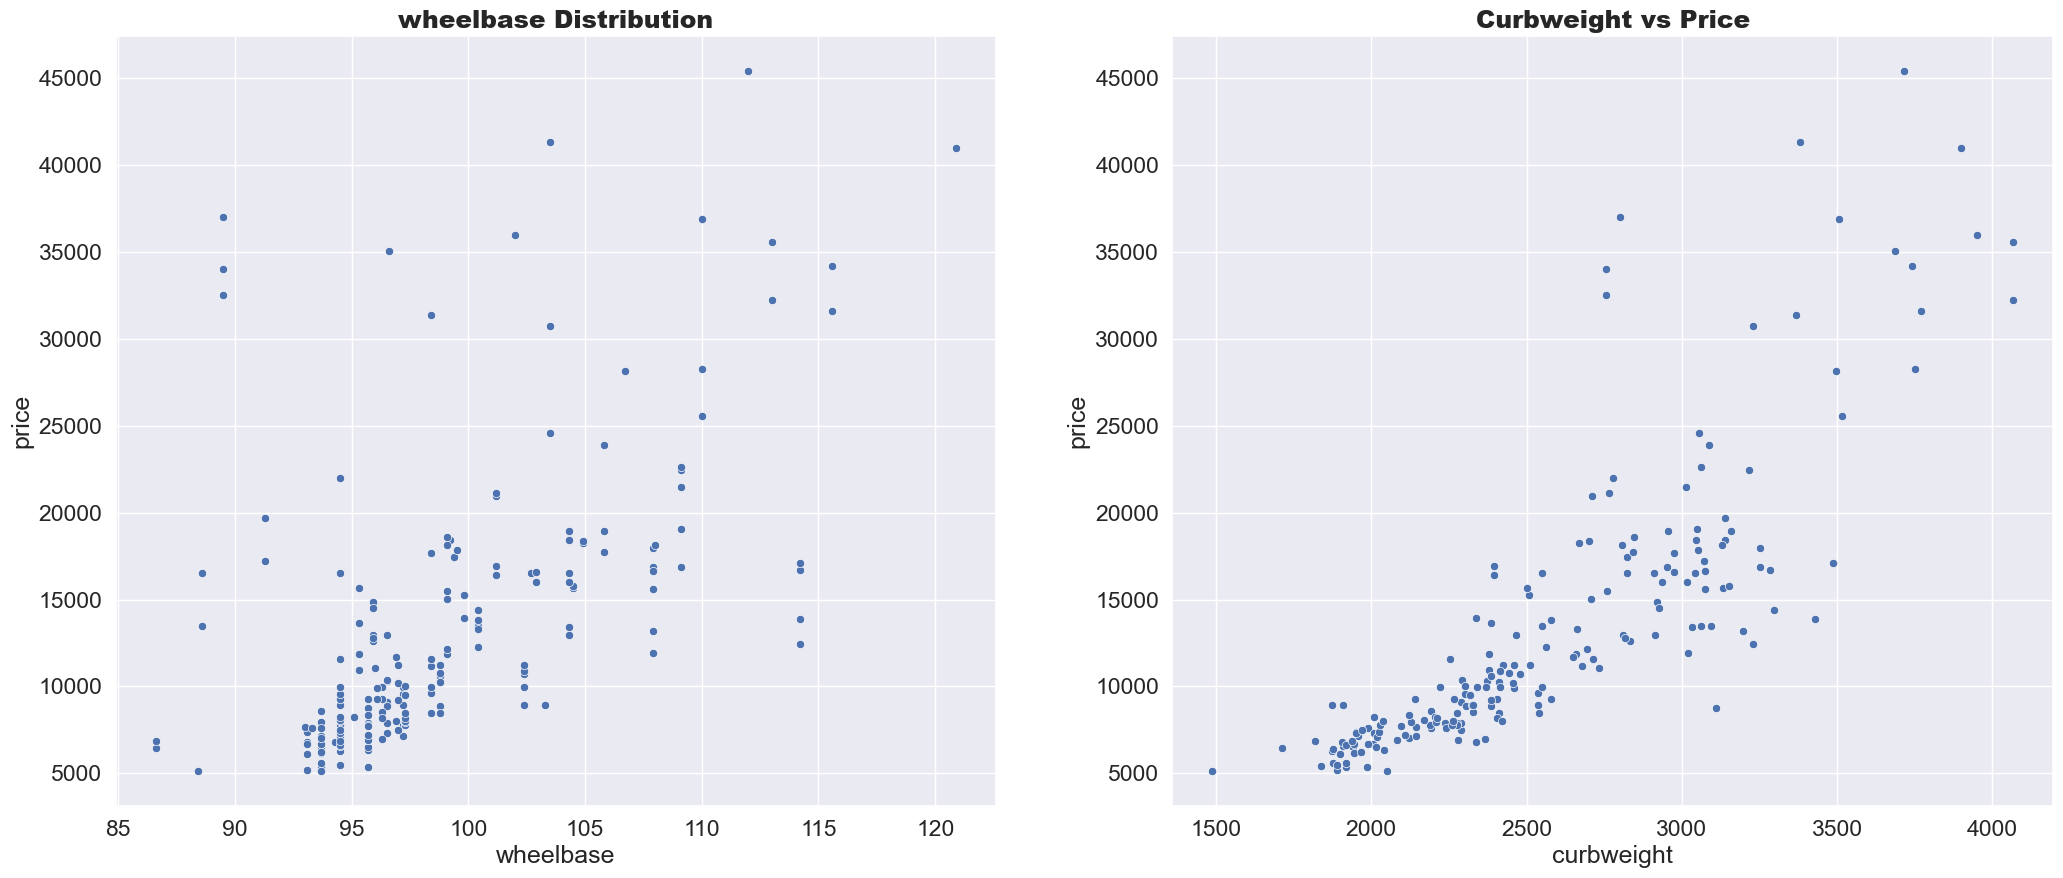

In [191]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.scatterplot(x='wheelbase',y='price',data=dfn,palette="Set2")
plt.title('wheelbase Distribution',fontweight="black",fontsize=18)

plt.subplot(1,2,2)
sns.scatterplot(x='curbweight',y='price',data=df,palette="Set2")
plt.title('Curbweight vs Price',fontweight="black",fontsize=18)


#### Observation:-
1. We can clearly observe that Curbweight is highly correlated with Price. So we can say with the increase in curbweight the price of cars increases.
2. From wheelbase vs price we can say that they are not highly correlated but still there's a correlation. So with wheel base the price of the cars also increases

### 6. Visualizing "Citympg" & "Highwaympg" Features

Text(0.5, 1.0, 'highwaympg vs Price')

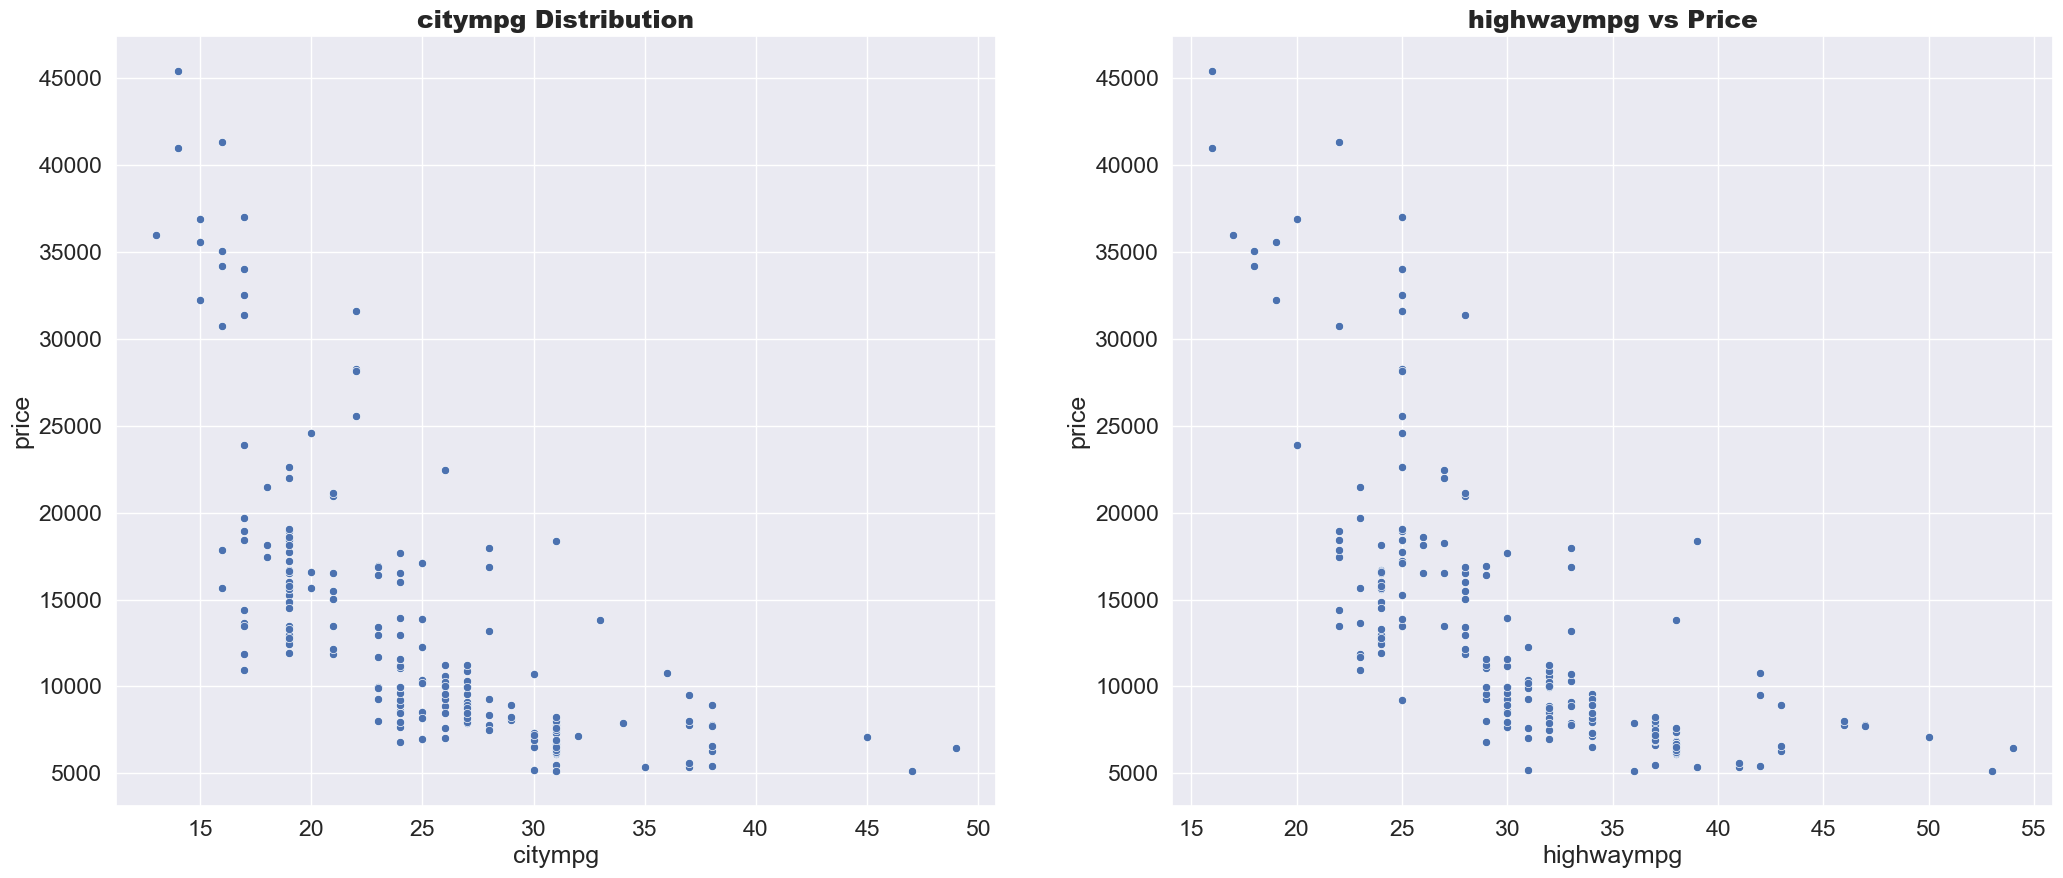

In [194]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.scatterplot(x='citympg',y='price',data=dfn,palette="Set2")
plt.title('citympg Distribution',fontweight="black",fontsize=18)

plt.subplot(1,2,2)
sns.scatterplot(x='highwaympg',y='price',data=df,palette="Set2")
plt.title('highwaympg vs Price',fontweight="black",fontsize=18)

#### Observation:-
1. We can clearly observe that Citympg & Highwaympg are having negative correlation with the price.
2. So we can say that with the increment in citympg & Highwaympg the price of the cars decreases.
    So our both Citympg & Highwaympg are useful features for price prediction.

<AxesSubplot:>

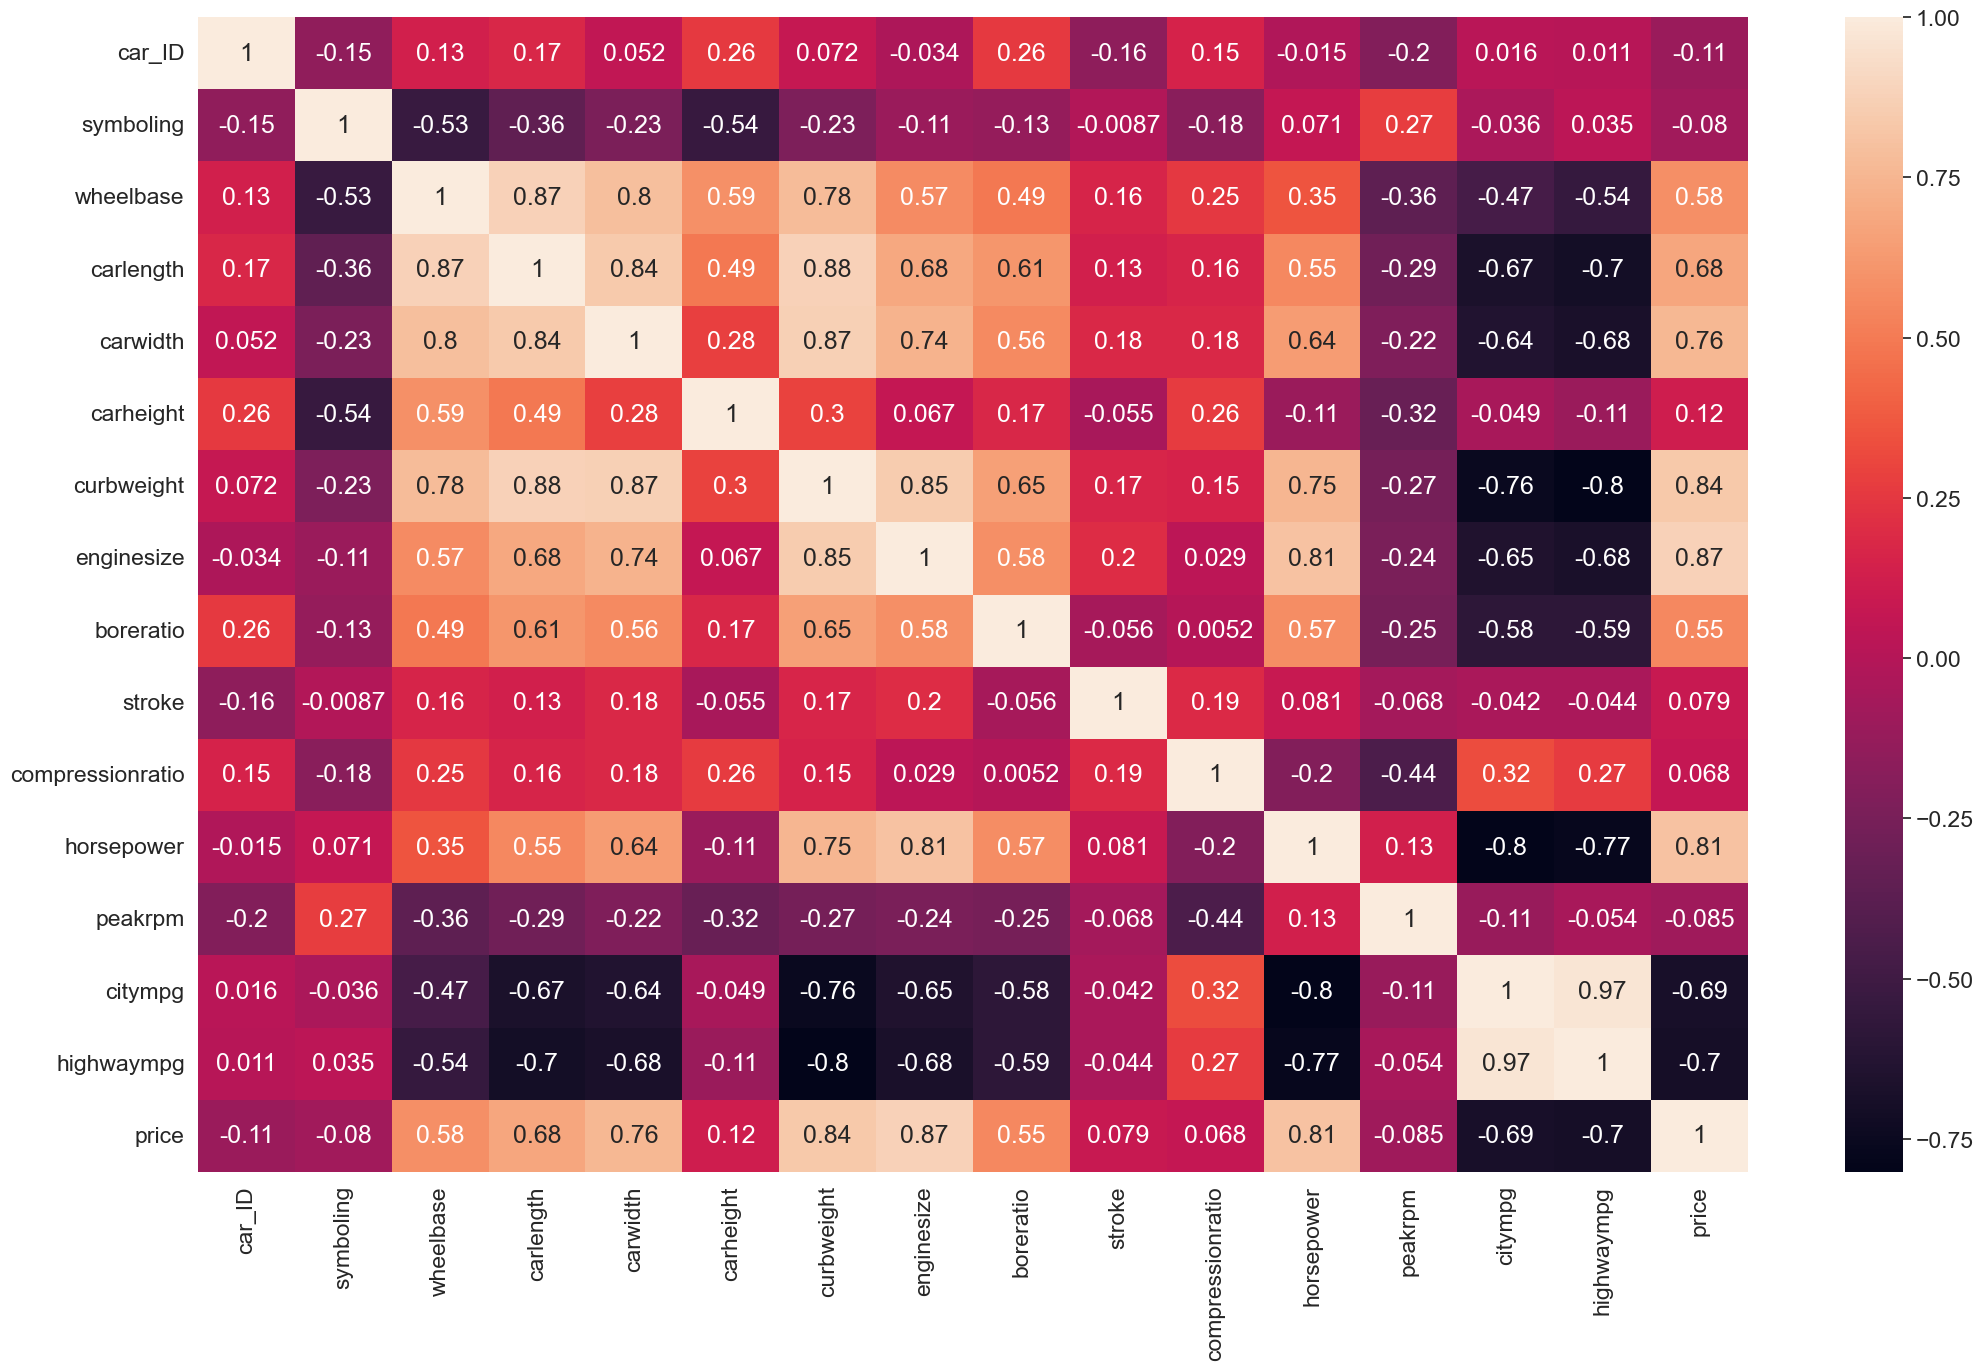

In [219]:
plt.figure(figsize=(25,15))
sns.heatmap(dfn.corr(),annot=True)

Heatmap to understand the corelation better.

# Data Preprocessing

In [424]:
#1. Creating new DataFrame with all the useful Features
new_df = df[['fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'
             ,'wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg',
             'price']]

In [425]:
#2.Creating Dummies Variables for all the Categorical Features
new_df = pd.get_dummies(columns=["fueltype","aspiration","doornumber","carbody","drivewheel","enginetype",
                                "cylindernumber","fuelsystem"],data=new_df)


NOTE:- We create dummy variables for categorical data to convert them into a numeric format that can be used as input for statistical models. Most machine learning algorithms and statistical models are designed to work with numeric data, and cannot directly process categorical data.

In [426]:
new_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [427]:
#3.Feature Scaling of Numerical Data
scaler=StandardScaler()
num_cols=['wheelbase','carlength' ,'carwidth' ,'curbweight' ,'enginesize','boreratio' ,'horsepower' ,'citympg','highwaympg']
new_df[num_cols] = scaler.fit_transform(new_df[num_cols])

In [428]:
new_df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,13495.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,-0.646553,-0.546059,16500.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.708596,-0.231513,-0.190566,0.514882,0.604046,-2.404880,1.264536,-0.953012,-0.691627,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
3,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.517266,-0.053668,-0.186865,-0.109354,13950.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.107110,0.207256,0.230001,0.516807,0.218885,-0.517266,0.275883,-1.106241,-1.273900,17450.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [429]:
#4.Feature Selection for Training and testing
X=new_df.drop(columns='price')
y=new_df['price']

In [430]:
#5 Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [431]:
print("X_train - >  ",X_train.shape)
print("X_test - >  ",X_test.shape)
print("y_train - >  ",y_train.shape)
print("y_test - >  ",y_test.shape)

X_train - >   (137, 45)
X_test - >   (68, 45)
y_train - >   (137,)
y_test - >   (68,)


# Model Building

In [432]:
train_score=[]
test_score=[]

def modelprediction(model):
    model.fit(X_train,y_train)
    X_train_pred=model.predict(X_train)
    X_test_pred=model.predict(X_test)
    a=r2_score(y_train,X_train_pred)*100
    b=r2_score(y_test,X_test_pred)*100
    train_score.append(a)
    test_score.append(b)
   
    
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)

    

In [433]:
#1.Linear Regression
modelprediction(LinearRegression())


r2_Score of LinearRegression() model on Training Data is: 93.29303204568315
r2_Score of LinearRegression() model on Testing Data is: 84.8234791699218


In [434]:
#2.Decision Tree
modelprediction(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Training Data is: 99.85255104645644
r2_Score of DecisionTreeRegressor() model on Testing Data is: 90.98315976471793


In [435]:
#3.Randomforest Regressor
modelprediction(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 98.53995733624565
r2_Score of RandomForestRegressor() model on Testing Data is: 93.79099124881714


In [436]:
#4.Adaboost Regressor
modelprediction(AdaBoostRegressor())

r2_Score of AdaBoostRegressor() model on Training Data is: 96.08420387579264
r2_Score of AdaBoostRegressor() model on Testing Data is: 88.3786014346664


In [437]:
#5.GradientBoost Regressor
modelprediction(GradientBoostingRegressor())

r2_Score of GradientBoostingRegressor() model on Training Data is: 99.32309328781376
r2_Score of GradientBoostingRegressor() model on Testing Data is: 90.98892782704243


In [438]:
#6.Xgboost Regressor
modelprediction(XGBRegressor())

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model on Training Data is: 99.85252143798097
r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
      

In [439]:
#7. Catboost REgressor
modelprediction(CatBoostRegressor(verbose=False))

r2_Score of <catboost.core.CatBoostRegressor object at 0x0000027B02BB2FA0> model on Training Data is: 99.7036861859825
r2_Score of <catboost.core.CatBoostRegressor object at 0x0000027B02BB2FA0> model on Testing Data is: 92.99139668104021


# Comparison of the Model

In [440]:
models = ["Linear Regression","Decision Tree","Random Forest","Ada Boost","Gradient Boost","XGBoost","CatBoost"]

In [444]:
df = pd.DataFrame({"Algorithms":models,
                   "Training Score":train_score,
                   "Testing Score":test_score})

In [445]:
df

,Algorithms,Training Score,Testing Score
0,Linear Regression,93.293032,84.823479
1,Decision Tree,99.852551,90.983160
2,Random Forest,98.539957,93.790991
3,Ada Boost,96.084204,88.378601
4,Gradient Boost,99.323093,90.988928
5,XGBoost,99.852521,90.683992
6,CatBoost,99.703686,92.991397


### Plotting above results using column-bar chart

<Figure size 1500x1000 with 0 Axes>

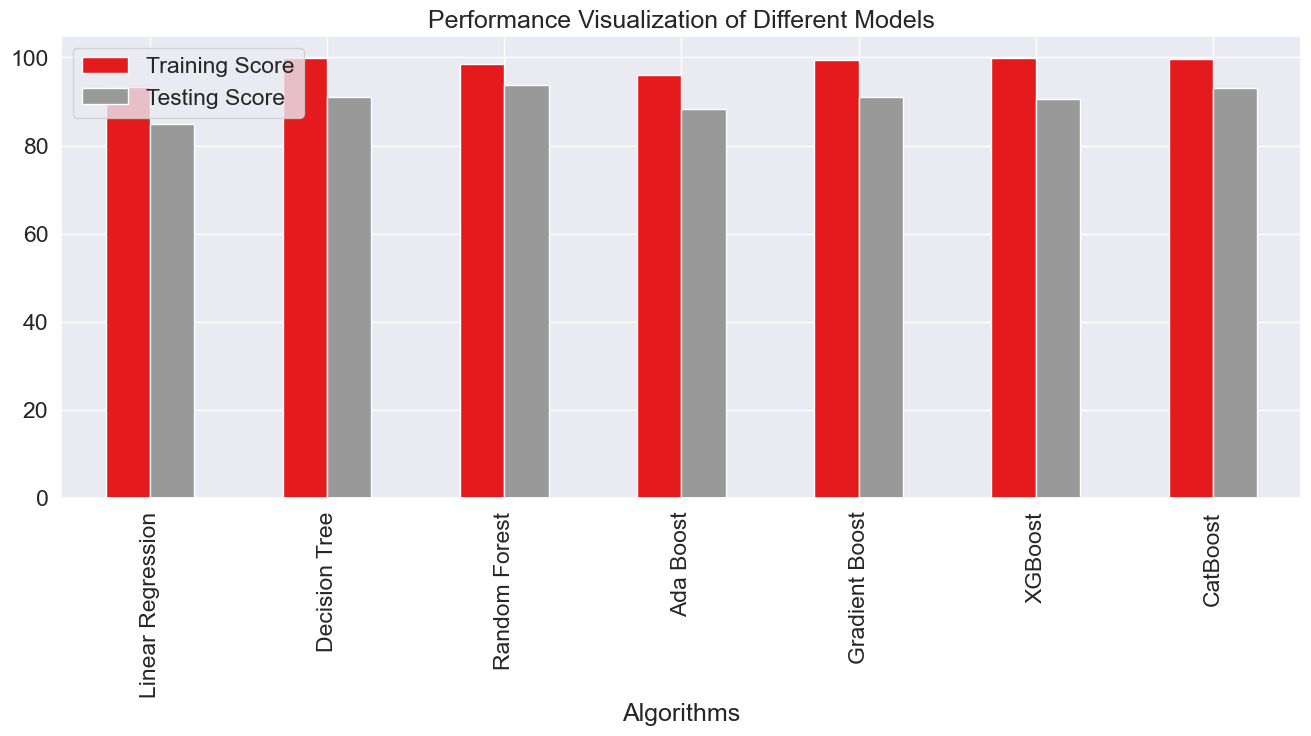

In [448]:
plt.figure(figsize=(15,10))
df.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

#### Observation
1. Highest performance was give by Random Forest Model around 93%.
2. But catboost & XGBoost Model performance was also good.
3. So we can use any of these three Models for predicting the price of car in future.